# Installing some dependencies

In [121]:
# !pip install -U scikit-learn
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas
# !pip install statsmodels
# !pip install xgboost
!pip install imbalanced-learn

# Importing dependencies

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\OmShree\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

# Reading the dataset

In [10]:
data = pd.read_csv('Dataset.csv')
original_data=data.copy()
print(data.head(10))
data.nunique()

   id  Gender   Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male  44.0              1.0         28.0                 0.0   
1   2    Male  76.0              1.0          3.0                 0.0   
2   3    Male  47.0              1.0         28.0                 0.0   
3   4    Male  21.0              1.0         11.0                 1.0   
4   5  Female  29.0              NaN         41.0                 1.0   
5   6  Female  24.0              NaN         33.0                 0.0   
6   7    Male  23.0              NaN         11.0                 0.0   
7   8  Female  56.0              1.0         28.0                 0.0   
8   9  Female  24.0              1.0          3.0                 1.0   
9  10  Female  32.0              1.0          6.0                 1.0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0    217.0   
1    1-2 Year             No         3

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48746
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [11]:
# shape of the dataframe 
data.shape

(381109, 12)

In [12]:
# summary of the dataset given
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,378590.00000,377925.000000,377876.000000,377901.000000,377943.000000,379154.000000,381014.000000,381109.000000
mean,190555.000000,38.81855,0.997867,26.393619,0.458178,30563.769928,112.040878,154.344021,0.122563
std,110016.836208,15.50903,0.046132,13.230413,0.498249,17216.943211,54.200731,83.672192,0.327936
min,1.000000,20.00000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.00000,1.000000,15.000000,0.000000,24406.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.00000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.00000,1.000000,35.000000,1.000000,39397.000000,152.000000,227.000000,0.000000
max,381109.000000,85.00000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [13]:
# displaying all the info of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                378700 non-null  object 
 2   Age                   378590 non-null  float64
 3   Driving_License       377925 non-null  float64
 4   Region_Code           377876 non-null  float64
 5   Previously_Insured    377901 non-null  float64
 6   Vehicle_Age           377651 non-null  object 
 7   Vehicle_Damage        377833 non-null  object 
 8   Annual_Premium        377943 non-null  float64
 9   Policy_Sales_Channel  379154 non-null  float64
 10  Vintage               381014 non-null  float64
 11  Response              381109 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 34.9+ MB


In [14]:
# finding the number of null values in each columns
null_count=data.isnull().sum()
null_count

id                         0
Gender                  2409
Age                     2519
Driving_License         3184
Region_Code             3233
Previously_Insured      3208
Vehicle_Age             3458
Vehicle_Damage          3276
Annual_Premium          3166
Policy_Sales_Channel    1955
Vintage                   95
Response                   0
dtype: int64

In [15]:
# percentage of null values in each column with respect to total data
percentage_null = (null_count / len(data)) * 100
percentage_null

id                      0.000000
Gender                  0.632103
Age                     0.660966
Driving_License         0.835457
Region_Code             0.848314
Previously_Insured      0.841754
Vehicle_Age             0.907352
Vehicle_Damage          0.859597
Annual_Premium          0.830733
Policy_Sales_Channel    0.512977
Vintage                 0.024927
Response                0.000000
dtype: float64

# Analyzing the Datasets

In [16]:
# Setting custome design for the graphs
custom_palette =["#8B008B", "#EE82EE", "#9400D3", "#9400D3", "#9932CC", "#BA55D3", "#DA70D6", "#DDA0DD", "#DDA0DD", "#DA70D6", "#BA55D3", "#9932CC", "#8B008B"]

sns.set_palette(custom_palette)

Response
0    334399
1     46710
Name: count, dtype: int64


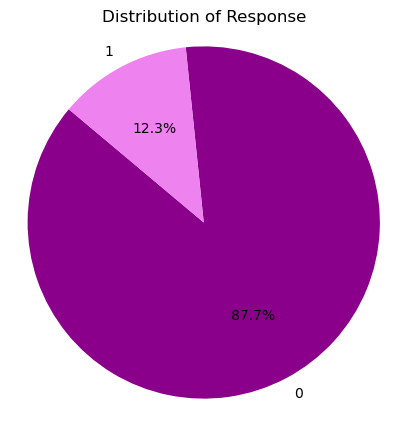

In [17]:
#Comparing the our target -> Responses
response_counts = data['Response'].value_counts()
print(response_counts)

# Create a pie chart using Matplotlib
plt.figure(figsize=(5, 5))
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Response')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Gender
Male      204727
Female    173973
Name: count, dtype: int64


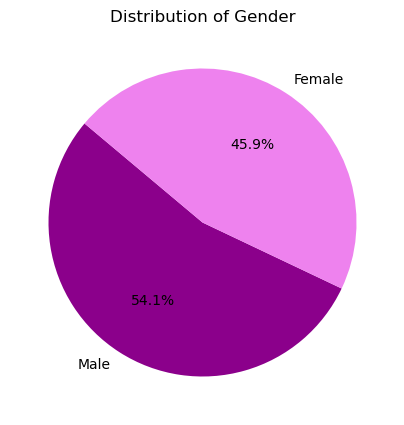

In [18]:
#Comparing the Gender Distribution
gender_counts = data['Gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show()


Driving_License
1.0    377119
0.0       806
Name: count, dtype: int64


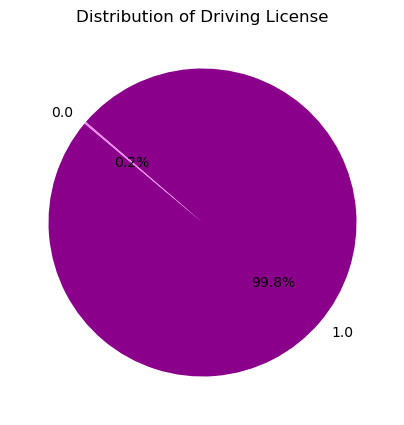

In [19]:
#Comparing the our Driving License distribution
license_counts = data['Driving_License'].value_counts()
print(license_counts)

plt.figure(figsize=(5, 5))
plt.pie(license_counts, labels=license_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Driving License')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Previously_Insured
0.0    204755
1.0    173146
Name: count, dtype: int64


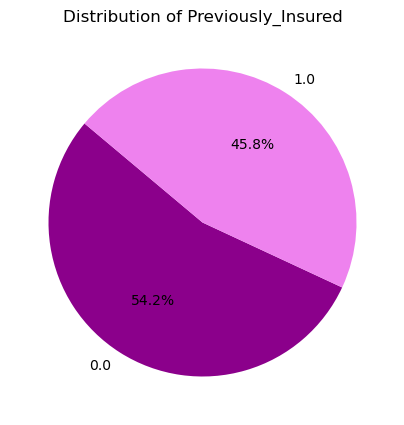

In [20]:
#Comparing the our Previously Insured distributions
previously_insured_counts = data['Previously_Insured'].value_counts()
print(previously_insured_counts)

plt.figure(figsize=(5, 5))
plt.pie(previously_insured_counts, labels=previously_insured_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Previously_Insured')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Vehicle_Age
1-2 Year     198448
< 1 Year     163343
> 2 Years     15860
Name: count, dtype: int64


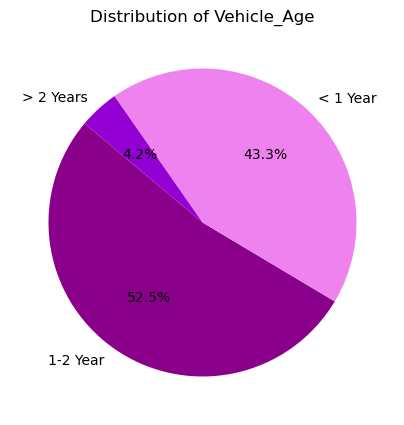

In [21]:
#Comparing the our Vehicle Age Distributions
vehicle_age_counts = data['Vehicle_Age'].value_counts()
print(vehicle_age_counts)

plt.figure(figsize=(5, 5))
plt.pie(vehicle_age_counts, labels=vehicle_age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vehicle_Age')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Vehicle_Damage
Yes    190748
No     187085
Name: count, dtype: int64


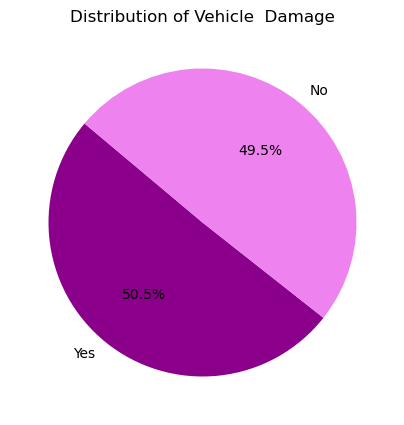

In [22]:
#Comparing the our Vehicle Damage Distribution
vehicle_damage_counts = data['Vehicle_Damage'].value_counts()
print(vehicle_damage_counts)

plt.figure(figsize=(5, 5))
plt.pie(vehicle_damage_counts, labels=vehicle_damage_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vehicle  Damage')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Bivariate Analysis

In [23]:
# Comparing the Gender with their Responses
response_counts = data.groupby(['Gender', 'Response']).size().reset_index(name='Counts')

# Compute total count by gender
total_count_by_gender = data.groupby('Gender').size().reset_index(name='Total_Count')

# Merge response_counts with total_count_by_gender
response_counts = response_counts.merge(total_count_by_gender, on='Gender')

# Calculate the percentage of responses by all responses for each gender
response_counts['Percentage'] = (response_counts['Counts'] / response_counts['Total_Count']) * 100

response_counts

,Gender,Response,Counts,Total_Count,Percentage
0,Female,0,155914,173973,89.619654
1,Female,1,18059,173973,10.380346
2,Male,0,176388,204727,86.157664
3,Male,1,28339,204727,13.842336


<Figure size 2000x1000 with 0 Axes>

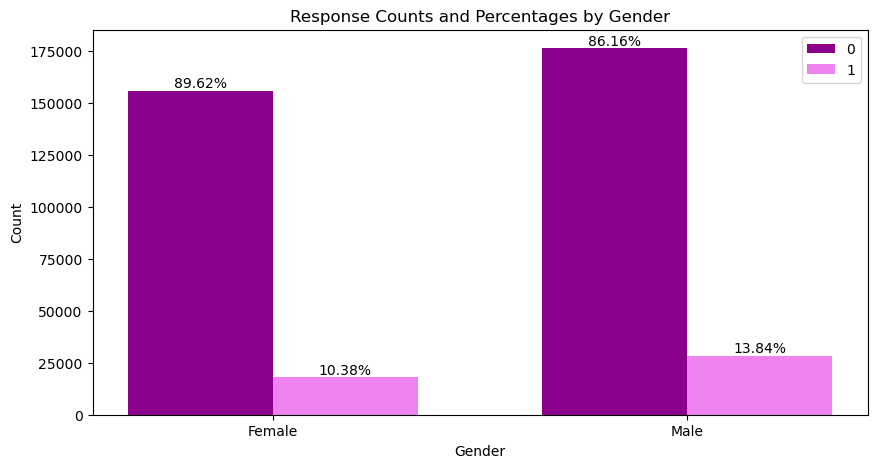

In [24]:
plt.figure(figsize=(20,10))

genders = response_counts['Gender'].unique()
responses = response_counts['Response'].unique()
counts = response_counts['Counts'].values.reshape(len(genders), -1)
percentages = response_counts['Percentage'].values.reshape(len(genders), -1)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Define width for each bar
bar_width = 0.35
index = np.arange(len(genders))

# Plot the bars for counts
bar1 = ax.bar(index - bar_width/2, counts[:, 0], bar_width, label=responses[0])
bar2 = ax.bar(index + bar_width/2, counts[:, 1], bar_width, label=responses[1])

# Plot the percentages as text on top of the bars
for i in range(len(genders)):
    ax.text(index[i] - bar_width/2, counts[i, 0], f'{percentages[i, 0]:.2f}%', ha='center', va='bottom')
    ax.text(index[i] + bar_width/2, counts[i, 1], f'{percentages[i, 1]:.2f}%', ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Response Counts and Percentages by Gender')
ax.set_xticks(index)
ax.set_xticklabels(genders)
ax.legend()

<Axes: xlabel='count', ylabel='Age'>

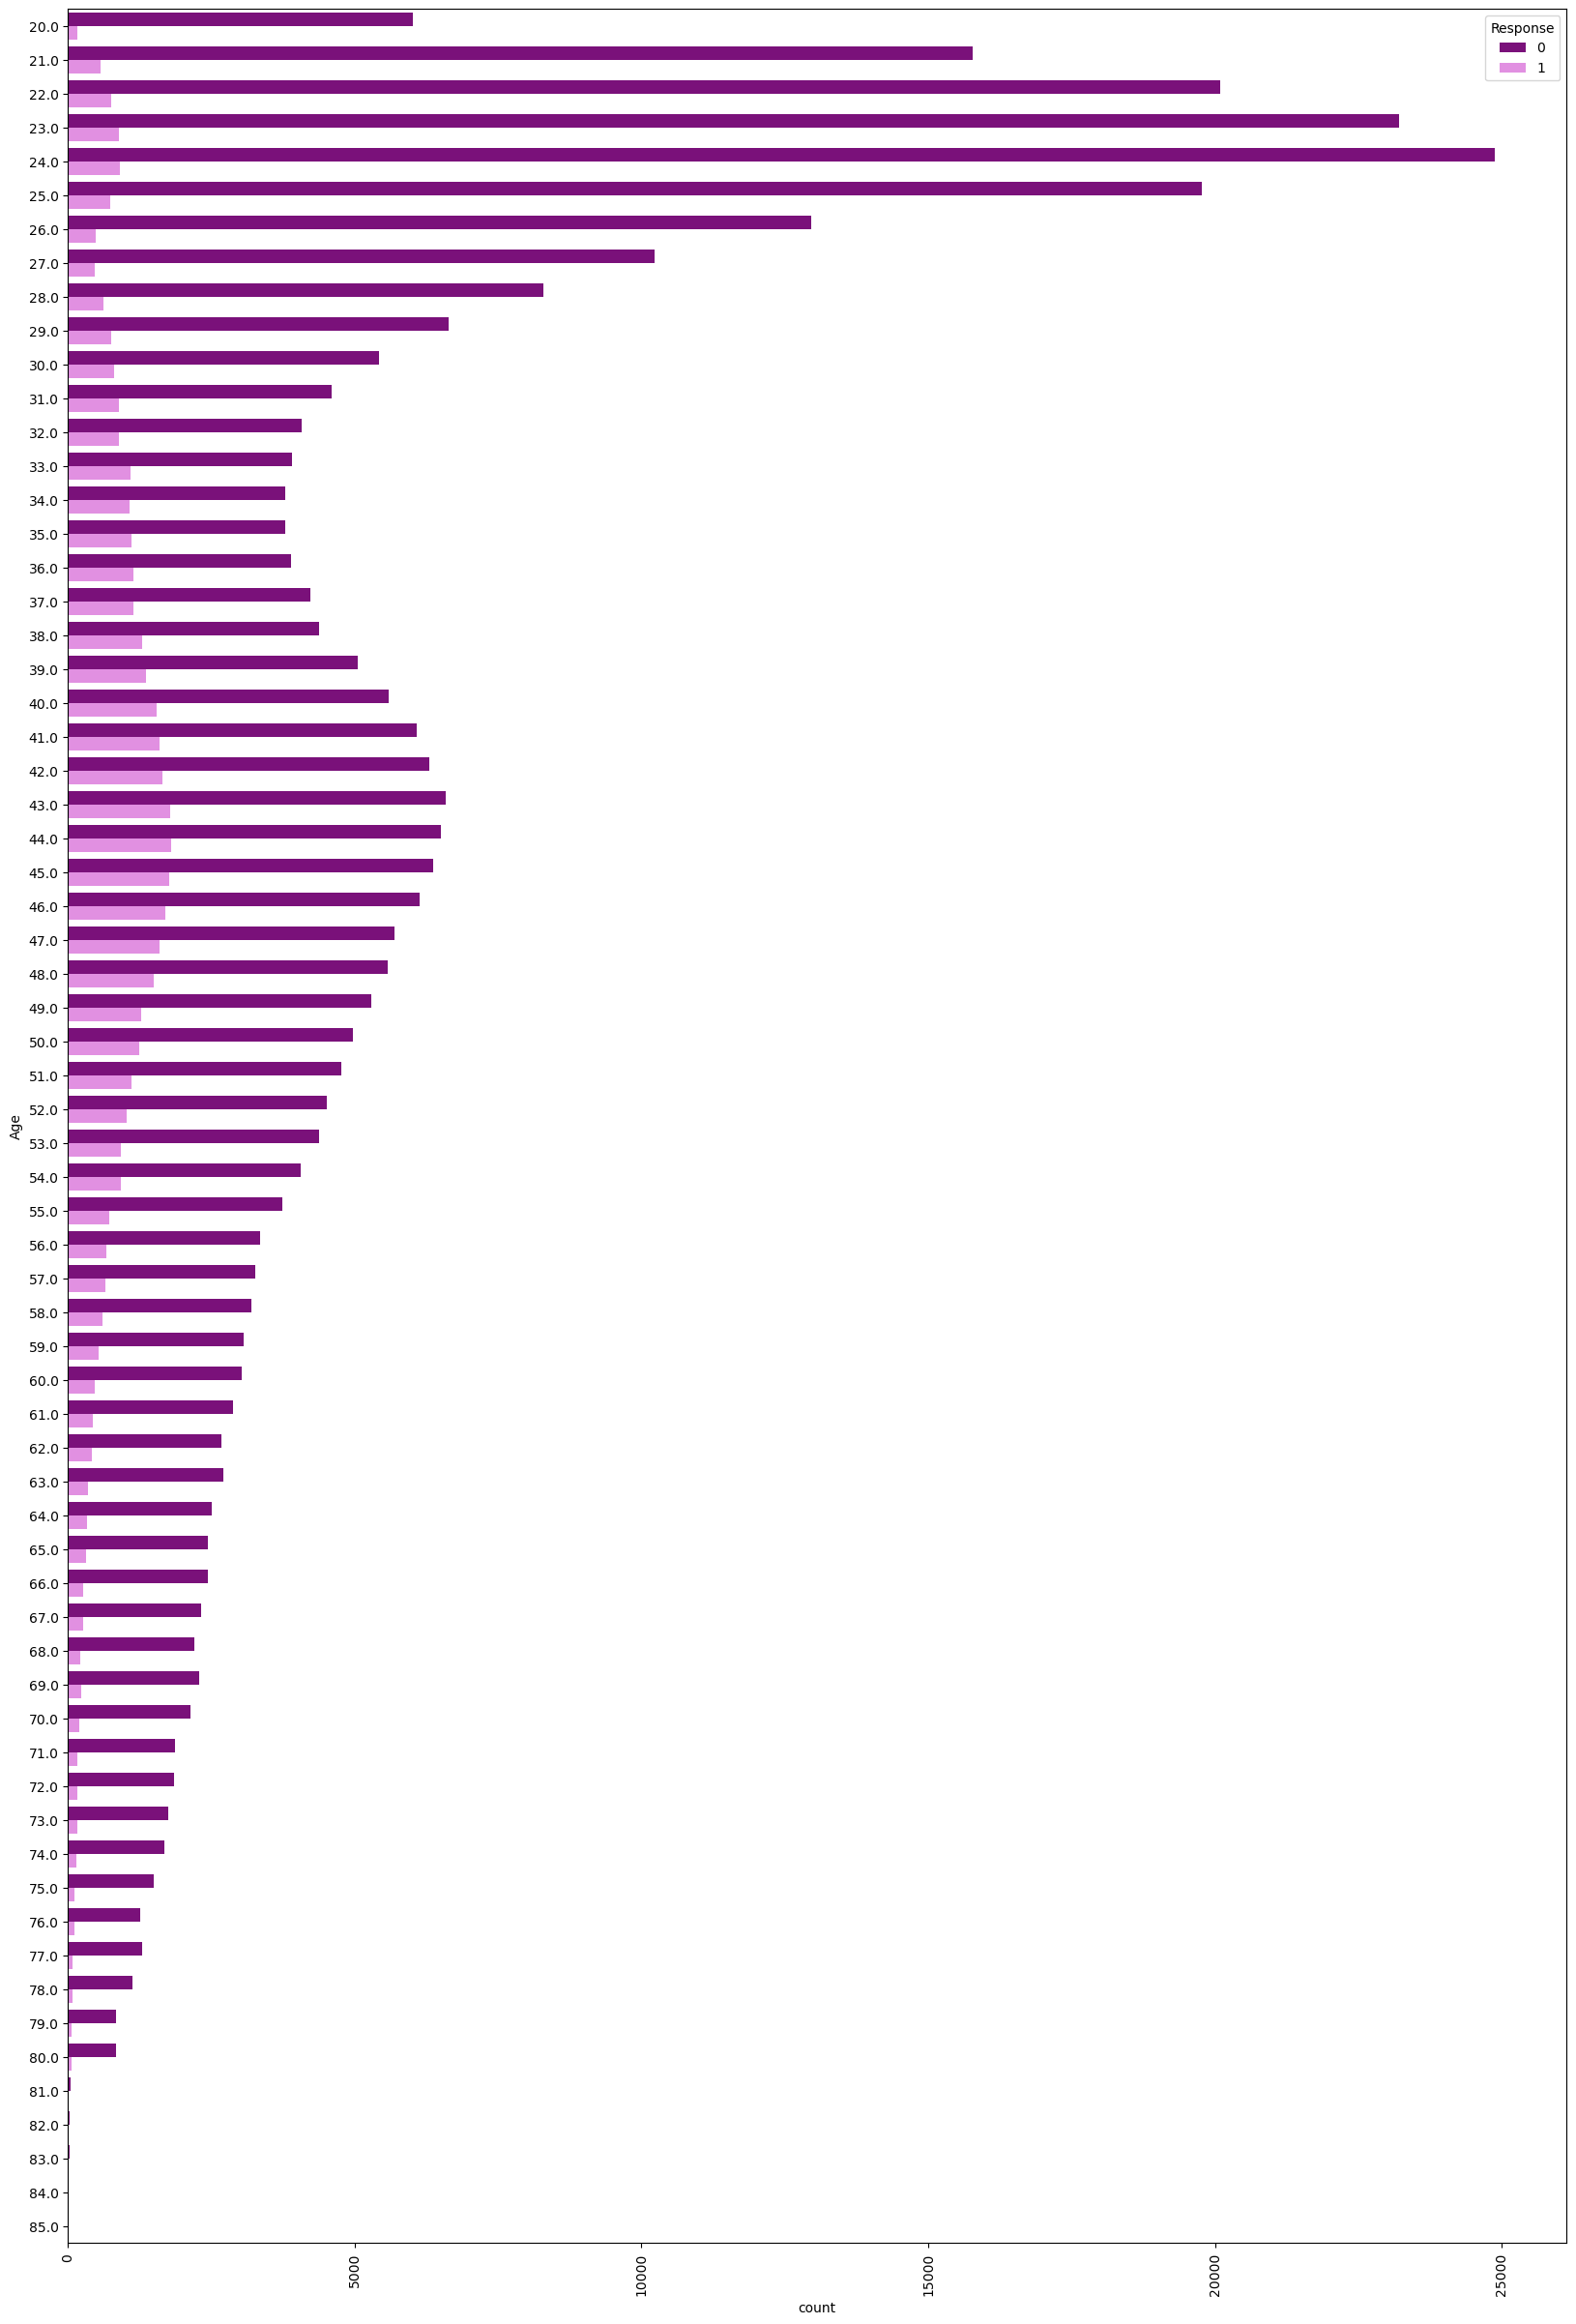

In [25]:
# relation between age and response
plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.countplot(data=data,hue='Response',y='Age')

In [26]:
# Comparing the response Percentage with respect to vehicle age
response_counts = data.groupby(['Vehicle_Age', 'Response']).size().unstack(fill_value=0)

# Compute total responses for each category in 'Vehicle_Age'
total_responses = response_counts.sum(axis=1)

# Compute percentage of 0 or 1 response with respect to the total responses for each category
response_counts['Percentage 0'] = (response_counts[0] / total_responses) * 100
response_counts['Percentage 1'] = (response_counts[1] / total_responses) * 100
response_counts

Response,0,1,Percentage 0,Percentage 1
Vehicle_Age,,,,
1-2 Year,163954,34494,82.618117,17.381883
< 1 Year,156211,7132,95.633728,4.366272
> 2 Years,11205,4655,70.649433,29.350567


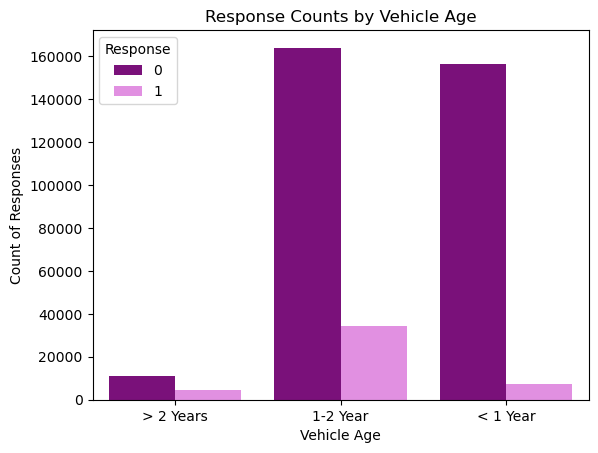

In [27]:
# Create the countplot for vehicle age and Response
ax = sns.countplot(data=data, hue='Response', x='Vehicle_Age')
ax.set_xlabel('Vehicle Age')
ax.set_ylabel('Count of Responses')
ax.set_title('Response Counts by Vehicle Age')

# Show the plot
plt.show()

In [28]:
response_counts = data.groupby(['Driving_License', 'Response']).size().reset_index(name='Counts')

# Compute total count by gender
total_count_by_license = data.groupby('Driving_License').size().reset_index(name='Total_Count')

# Merge response_counts with total_count_by_gender
response_counts = response_counts.merge(total_count_by_license, on='Driving_License')

# Calculate the percentage of responses by all responses for each gender
response_counts['Percentage'] = (response_counts['Counts'] / response_counts['Total_Count']) * 100

# Display response_counts with percentage
response_counts

,Driving_License,Response,Counts,Total_Count,Percentage
0,0.0,0,765,806,94.913151
1,0.0,1,41,806,5.086849
2,1.0,0,330857,377119,87.732785
3,1.0,1,46262,377119,12.267215


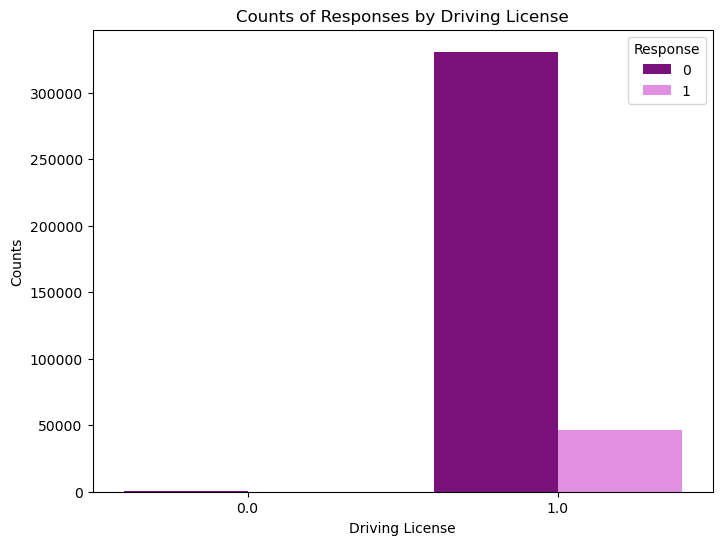

In [29]:
#  relation between response and driving license
plt.figure(figsize=(8, 6))
sns.barplot(data=response_counts, x='Driving_License', y='Counts', hue='Response')

# Add labels and title
plt.xlabel('Driving License')
plt.ylabel('Counts')
plt.title('Counts of Responses by Driving License')


# Show the plot
plt.legend(title='Response')
plt.show()

In [30]:
# Comparing region code and responses
response_counts = data.groupby(['Region_Code', 'Response']).size().reset_index(name='Counts')

# Compute total count by gender
total_count_by_license = data.groupby('Region_Code').size().reset_index(name='Total_Count')

# Merge response_counts with total_count_by_gender
response_counts = response_counts.merge(total_count_by_license, on='Region_Code')

# Calculate the percentage of responses by all responses for each gender
response_counts['Percentage'] = (response_counts['Counts'] / response_counts['Total_Count']) * 100
response_counts_filtered = response_counts[response_counts['Response'] != 0]

# Compute the percentage of responses for each region code
response_counts_filtered['Percentage'] = (response_counts_filtered['Counts'] / response_counts_filtered['Total_Count']) * 100

response_counts_filtered



C:\Users\OmShree\AppData\Local\Temp\ipykernel_7412\2220345829.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_counts_filtered['Percentage'] = (response_counts_filtered['Counts'] / response_counts_filtered['Total_Count']) * 100


,Region_Code,Response,Counts,Total_Count,Percentage
1,0.0,1,172,1995,8.621554
3,1.0,1,109,997,10.932798
5,2.0,1,285,4017,7.094847
7,3.0,1,1172,9157,12.798952
9,4.0,1,278,1782,15.600449
11,5.0,1,148,1266,11.690363
13,6.0,1,433,6229,6.951357
15,7.0,1,427,3245,13.158706
17,8.0,1,3232,33590,9.621911
19,9.0,1,251,3071,8.173233


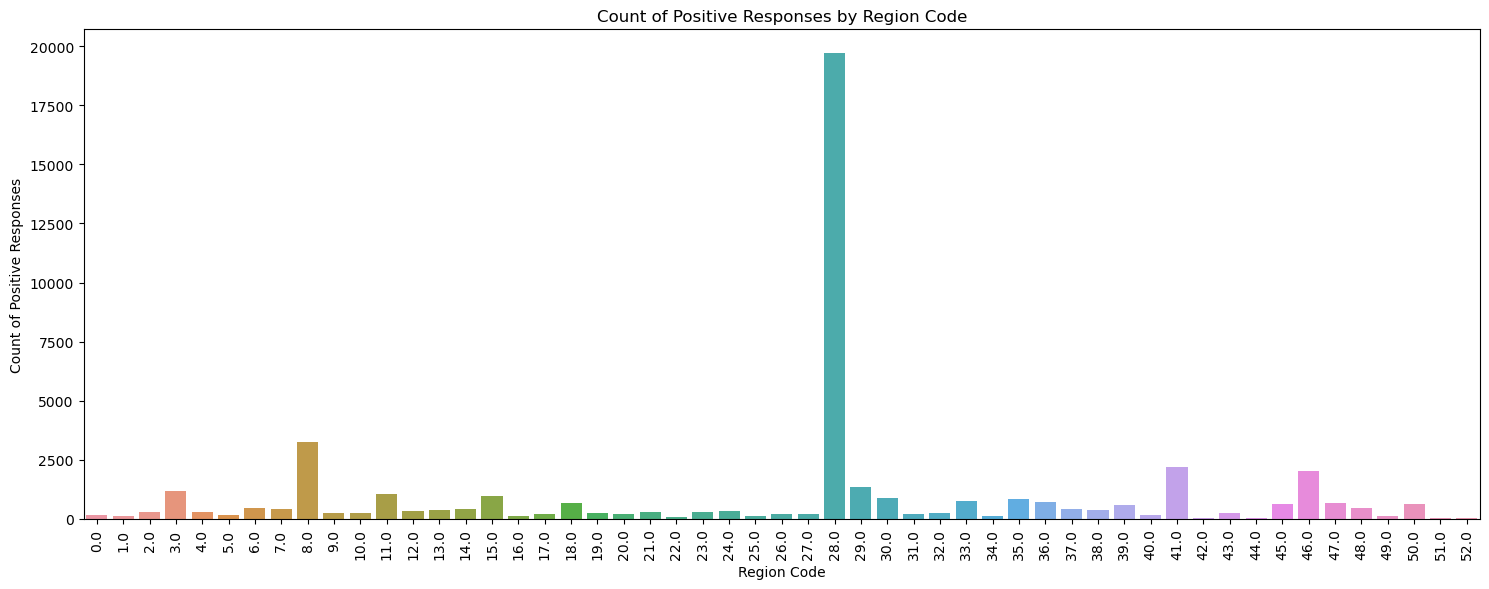

In [35]:
plt.figure(figsize=(15, 6))
sns.barplot(data=response_counts_filtered, x='Region_Code', y='Counts')

# Add labels and title
plt.xlabel('Region Code')
plt.ylabel('Count of Positive Responses')
plt.title('Count of Positive Responses by Region Code')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
response_counts = data.groupby(['Previously_Insured', 'Response']).size().reset_index(name='Counts')

# Compute total count by gender
total_count_by_license = data.groupby('Previously_Insured').size().reset_index(name='Total_Count')

# Merge response_counts with total_count_by_gender
response_counts = response_counts.merge(total_count_by_license, on='Previously_Insured')

# Calculate the percentage of responses by all responses for each gender
response_counts['Percentage'] = (response_counts['Counts'] / response_counts['Total_Count']) * 100
response_counts

,Previously_Insured,Response,Counts,Total_Count,Percentage
0,0.0,0,158610,204755,77.463310
1,0.0,1,46145,204755,22.536690
2,1.0,0,172988,173146,99.908748
3,1.0,1,158,173146,0.091252


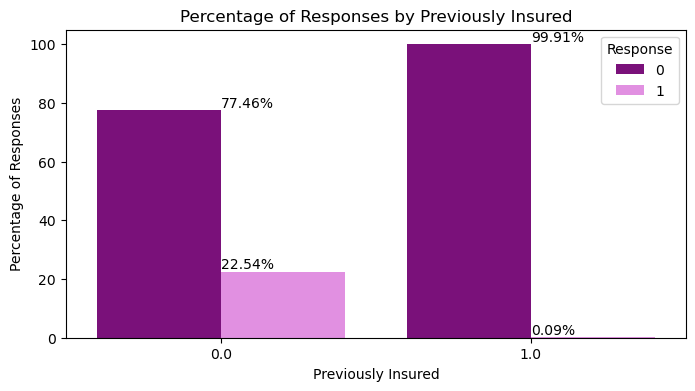

In [37]:
plt.figure(figsize=(8, 4))
sns.barplot(data=response_counts, x='Previously_Insured', y='Percentage', hue='Response')

# Add labels and title
plt.xlabel('Previously Insured')
plt.ylabel('Percentage of Responses')
plt.title('Percentage of Responses by Previously Insured')

# Annotate the bars with the percentage values just above the bars
for index, row in response_counts.iterrows():
    plt.text(row['Previously_Insured'], row['Percentage'] + 1, f'{row["Percentage"]:.2f}%', color='black')

# Show the plot
plt.legend(title='Response')
plt.show()

In [38]:
df=data.copy()
response_filtered_prev_insured = df[df['Previously_Insured'] == False]
response_filtered_prev_insured

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1
5,6,Female,24.0,NaN,33.0,0.0,NaN,Yes,2630.0,160.0,176.0,0
6,7,Male,23.0,NaN,11.0,0.0,NaN,Yes,23367.0,152.0,249.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381100,381101,Female,29.0,1.0,28.0,0.0,< 1 Year,Yes,49007.0,124.0,137.0,0
381101,381102,Female,70.0,1.0,28.0,0.0,> 2 Years,Yes,50904.0,122.0,215.0,0
381103,381104,Male,47.0,1.0,50.0,0.0,1-2 Year,Yes,39831.0,26.0,235.0,0
381107,381108,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0


In [39]:
# Comparing the Gender with their Responses
response_counts = response_filtered_prev_insured.groupby(['Gender', 'Response']).size().reset_index(name='Counts')

# Compute total count by gender
total_count_by_gender =response_filtered_prev_insured.groupby('Gender').size().reset_index(name='Total_Count')

# Merge response_counts with total_count_by_gender
response_counts = response_counts.merge(total_count_by_gender, on='Gender')

# Calculate the percentage of responses by all responses for each gender
response_counts['Percentage'] = (response_counts['Counts'] / response_counts['Total_Count']) * 100

response_counts

,Gender,Response,Counts,Total_Count,Percentage
0,Female,0,68379,86327,79.209286
1,Female,1,17948,86327,20.790714
2,Male,0,90167,118347,76.188666
3,Male,1,28180,118347,23.811334


<Figure size 2000x1000 with 0 Axes>

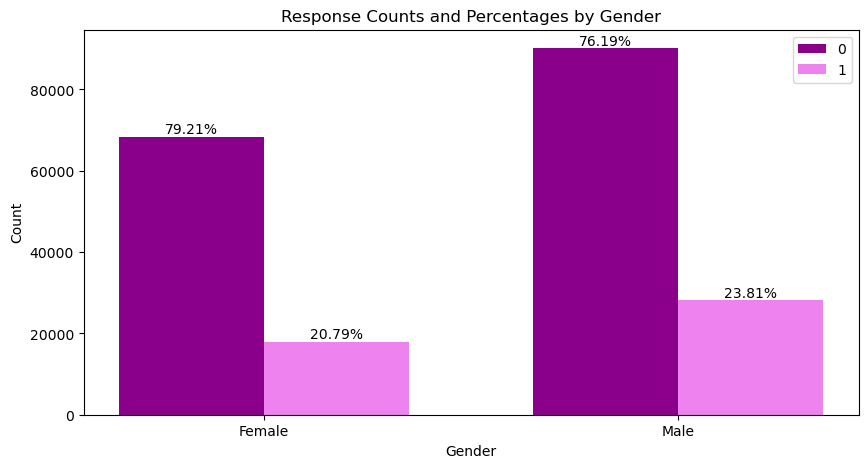

In [40]:
plt.figure(figsize=(20,10))

genders = response_counts['Gender'].unique()
responses = response_counts['Response'].unique()
counts = response_counts['Counts'].values.reshape(len(genders), -1)
percentages = response_counts['Percentage'].values.reshape(len(genders), -1)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Define width for each bar
bar_width = 0.35
index = np.arange(len(genders))

# Plot the bars for counts
bar1 = ax.bar(index - bar_width/2, counts[:, 0], bar_width, label=responses[0])
bar2 = ax.bar(index + bar_width/2, counts[:, 1], bar_width, label=responses[1])

# Plot the percentages as text on top of the bars
for i in range(len(genders)):
    ax.text(index[i] - bar_width/2, counts[i, 0], f'{percentages[i, 0]:.2f}%', ha='center', va='bottom')
    ax.text(index[i] + bar_width/2, counts[i, 1], f'{percentages[i, 1]:.2f}%', ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Response Counts and Percentages by Gender')
ax.set_xticks(index)
ax.set_xticklabels(genders)
ax.legend()

<Axes: xlabel='count', ylabel='Age'>

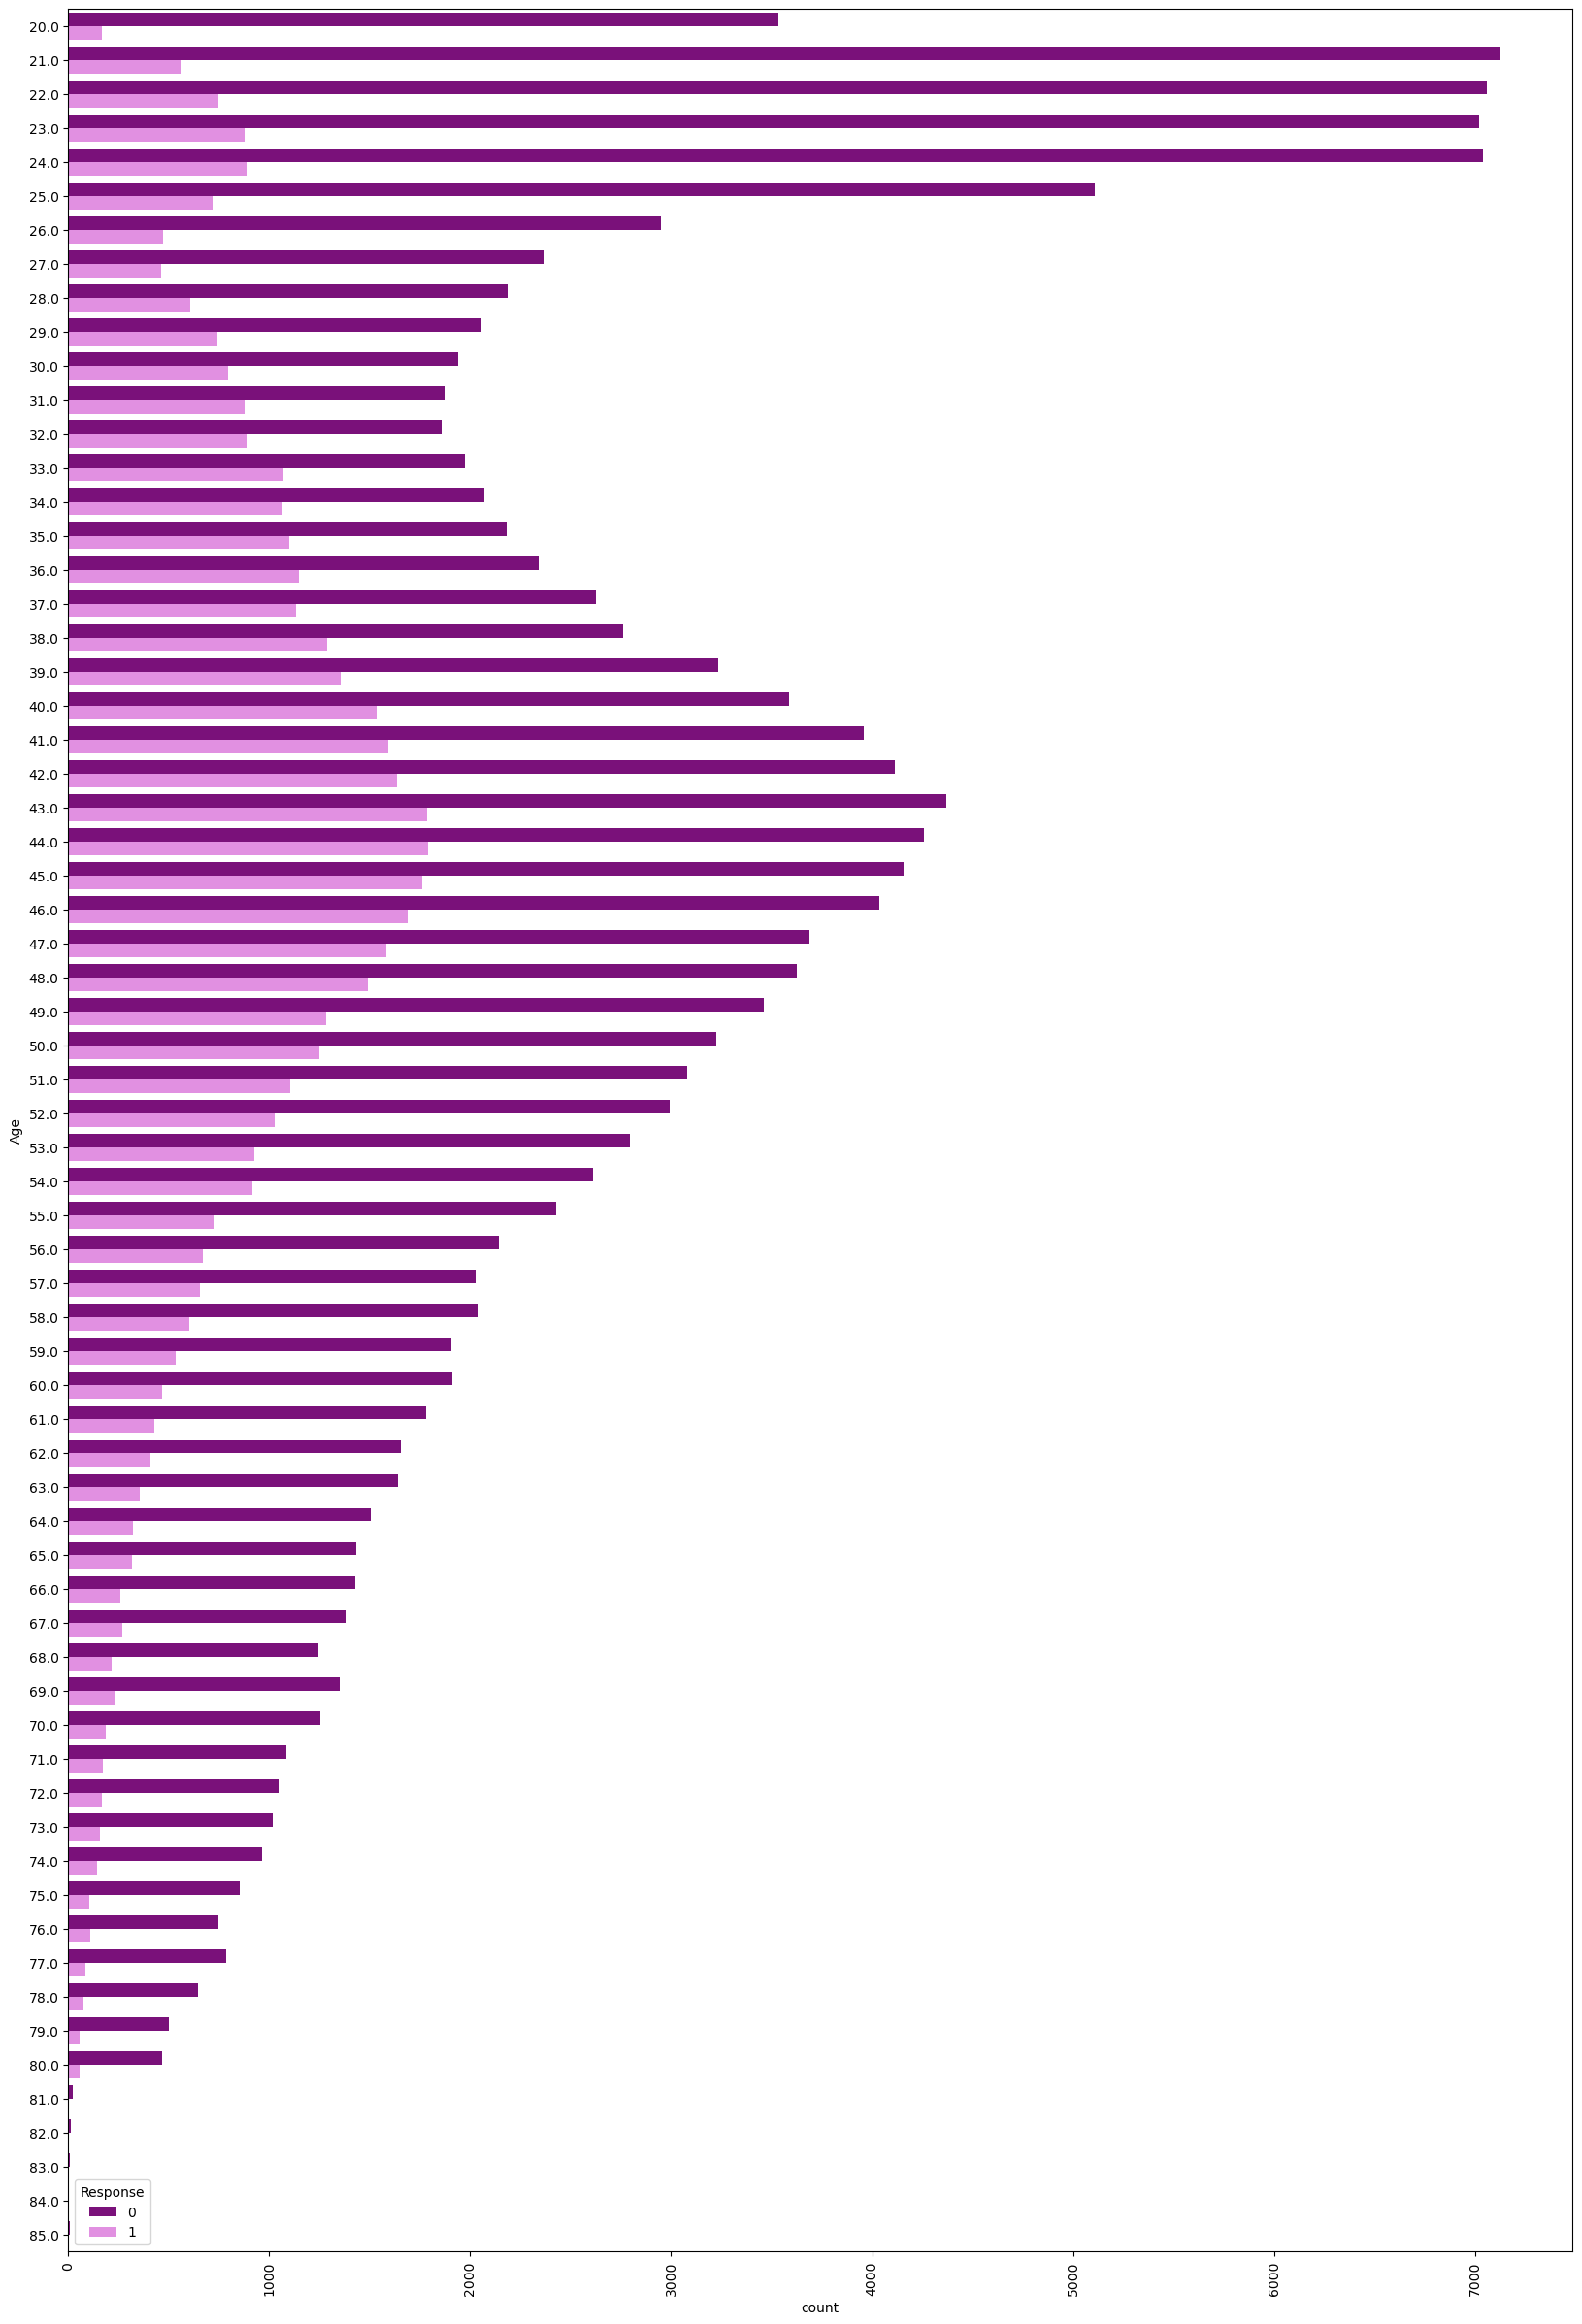

In [41]:
# relation between age and response
plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.countplot(data=response_filtered_prev_insured,hue='Response',y='Age')

In [42]:
# Comparing the response Percentage with respect to vehicle age
response_counts = response_filtered_prev_insured.groupby(['Vehicle_Age', 'Response']).size().unstack(fill_value=0)

# Compute total responses for each category in 'Vehicle_Age'
total_responses = response_counts.sum(axis=1)

# Compute percentage of 0 or 1 response with respect to the total responses for each category
response_counts['Percentage 0'] = (response_counts[0] / total_responses) * 100
response_counts['Percentage 1'] = (response_counts[1] / total_responses) * 100
response_counts

Response,0,1,Percentage 0,Percentage 1
Vehicle_Age,,,,
1-2 Year,99319,34382,74.284411,25.715589
< 1 Year,47971,7069,87.156613,12.843387
> 2 Years,11154,4652,70.568139,29.431861


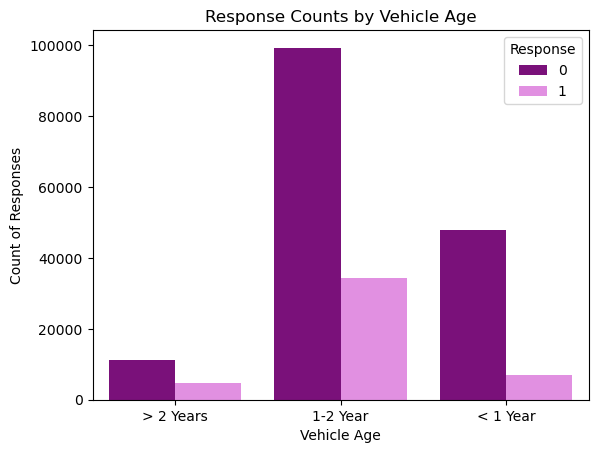

In [43]:
# Create the countplot for vehicle age and Response
ax = sns.countplot(data=response_filtered_prev_insured, hue='Response', x='Vehicle_Age')
ax.set_xlabel('Vehicle Age')
ax.set_ylabel('Count of Responses')
ax.set_title('Response Counts by Vehicle Age')

# Show the plot
plt.show()

In [44]:
response_counts = response_filtered_prev_insured.groupby(['Driving_License', 'Response']).size().reset_index(name='Counts')

# Compute total count by gender
total_count_by_license = response_filtered_prev_insured.groupby('Driving_License').size().reset_index(name='Total_Count')

# Merge response_counts with total_count_by_gender
response_counts = response_counts.merge(total_count_by_license, on='Driving_License')

# Calculate the percentage of responses by all responses for each gender
response_counts['Percentage'] = (response_counts['Counts'] / response_counts['Total_Count']) * 100

# Display response_counts with percentage
response_counts

,Driving_License,Response,Counts,Total_Count,Percentage
0,0.0,0,525,566,92.756184
1,0.0,1,41,566,7.243816
2,1.0,0,158023,204110,77.420509
3,1.0,1,46087,204110,22.579491


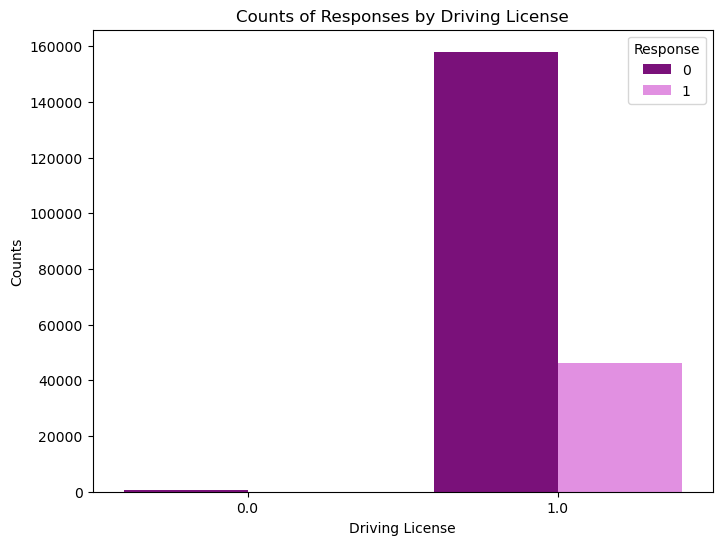

In [45]:
#  relation between response and driving license
plt.figure(figsize=(8, 6))
sns.barplot(data=response_counts, x='Driving_License', y='Counts', hue='Response')

# Add labels and title
plt.xlabel('Driving License')
plt.ylabel('Counts')
plt.title('Counts of Responses by Driving License')


# Show the plot
plt.legend(title='Response')
plt.show()

In [46]:
# Comparing region code and responses
response_counts = response_filtered_prev_insured.groupby(['Region_Code', 'Response']).size().reset_index(name='Counts')

# Compute total count by gender
total_count_by_license = response_filtered_prev_insured.groupby('Region_Code').size().reset_index(name='Total_Count')

# Merge response_counts with total_count_by_gender
response_counts = response_counts.merge(total_count_by_license, on='Region_Code')

# Calculate the percentage of responses by all responses for each gender
response_counts['Percentage'] = (response_counts['Counts'] / response_counts['Total_Count']) * 100
response_counts_filtered = response_counts[response_counts['Response'] != 0]

# Compute the percentage of responses for each region code
response_counts_filtered['Percentage'] = (response_counts_filtered['Counts'] / response_counts_filtered['Total_Count']) * 100

response_counts_filtered



C:\Users\OmShree\AppData\Local\Temp\ipykernel_7412\2017774441.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_counts_filtered['Percentage'] = (response_counts_filtered['Counts'] / response_counts_filtered['Total_Count']) * 100


,Region_Code,Response,Counts,Total_Count,Percentage
1,0.0,1,171,1389,12.311015
3,1.0,1,108,674,16.023739
5,2.0,1,279,2065,13.510896
7,3.0,1,1163,4686,24.818609
9,4.0,1,277,1035,26.763285
11,5.0,1,148,795,18.616352
13,6.0,1,431,1908,22.589099
15,7.0,1,427,1913,22.320962
17,8.0,1,3220,16625,19.368421
19,9.0,1,251,1725,14.550725


In [47]:
response_counts = data.groupby(['Vehicle_Damage', 'Response']).size().reset_index(name='Counts')

# Compute total count by gender
total_count_by_license = data.groupby('Vehicle_Damage').size().reset_index(name='Total_Count')

# Merge response_counts with total_count_by_gender
response_counts = response_counts.merge(total_count_by_license, on='Vehicle_Damage')

# Calculate the percentage of responses by all responses for each gender
response_counts['Percentage'] = (response_counts['Counts'] / response_counts['Total_Count']) * 100
response_counts

,Vehicle_Damage,Response,Counts,Total_Count,Percentage
0,No,0,186113,187085,99.480450
1,No,1,972,187085,0.519550
2,Yes,0,145416,190748,76.234613
3,Yes,1,45332,190748,23.765387


In [48]:
plt.figure(figsize=(8, 4))
sns.barplot(data=response_counts, x='Vehicle_Damage', y='Percentage', hue='Response')

# Add labels and title
plt.xlabel('Vehicle_Damage')
plt.ylabel('Percentage of Responses')
plt.title('Percentage of Responses by Vehicle_Damage')

# Annotate the bars with the percentage values just above the bars
for index, row in response_counts.iterrows():
    plt.text(row['Vehicle_Damage'], row['Percentage'] + 1, f'{row["Percentage"]:.2f}%', color='black')

# Show the plot
plt.legend(title='Response')
plt.show()

ConversionError: Failed to convert value(s) to axis units: 'No'

<Figure size 800x400 with 1 Axes>

In [49]:
response_counts = data.groupby(['Policy_Sales_Channel', 'Response']).size().reset_index(name='Counts')

# Compute total count by gender
total_count_by_license = data.groupby('Policy_Sales_Channel').size().reset_index(name='Total_Count')

# Merge response_counts with total_count_by_gender
response_counts = response_counts.merge(total_count_by_license, on='Policy_Sales_Channel')

# Calculate the percentage of responses by all responses for each gender
response_counts['Percentage'] = (response_counts['Counts'] / response_counts['Total_Count']) * 100
response_counts_filtered = response_counts[response_counts['Response'] != 0]

# Compute the percentage of responses for each region code
response_counts_filtered['Percentage'] = (response_counts_filtered['Counts'] / response_counts_filtered['Total_Count']) * 100
print(len(response_counts_filtered))
response_counts_filtered


121


C:\Users\OmShree\AppData\Local\Temp\ipykernel_7412\2609945085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_counts_filtered['Percentage'] = (response_counts_filtered['Counts'] / response_counts_filtered['Total_Count']) * 100


,Policy_Sales_Channel,Response,Counts,Total_Count,Percentage
1,1.0,1,34,1070,3.177570
3,2.0,1,1,4,25.000000
5,3.0,1,157,517,30.367505
7,4.0,1,102,507,20.118343
10,7.0,1,182,1581,11.511701
...,...,...,...,...,...
265,157.0,1,1787,6646,26.888354
267,158.0,1,133,488,27.254098
269,159.0,1,1,51,1.960784
271,160.0,1,474,21675,2.186851


In [50]:
response_counts_filtered = response_counts_filtered[response_counts_filtered['Total_Count'] > 100]

# Sort the filtered DataFrame by 'Percentage' column in descending order
top_10_policy_channels  = response_counts_filtered.sort_values(by='Percentage', ascending=False).head(10)
top_10_policy_channels 

,Policy_Sales_Channel,Response,Counts,Total_Count,Percentage
261,155.0,1,395,1233,32.035685
5,3.0,1,157,517,30.367505
273,163.0,1,873,2876,30.354659
267,158.0,1,133,488,27.254098
265,157.0,1,1787,6646,26.888354
58,31.0,1,158,627,25.199362
259,154.0,1,1463,5953,24.575844
251,150.0,1,76,312,24.358974
232,136.0,1,40,185,21.621622
263,156.0,1,2288,10615,21.554404


In [51]:
failed_counts_filtered = response_counts_filtered[response_counts_filtered['Percentage'] < 5]
print(len(failed_counts_filtered))
failed_counts_filtered

6


,Policy_Sales_Channel,Response,Counts,Total_Count,Percentage
1,1.0,1,34,1070,3.177570
32,18.0,1,6,167,3.592814
201,119.0,1,5,103,4.854369
253,151.0,1,121,3864,3.131470
255,152.0,1,3832,134108,2.857399
271,160.0,1,474,21675,2.186851


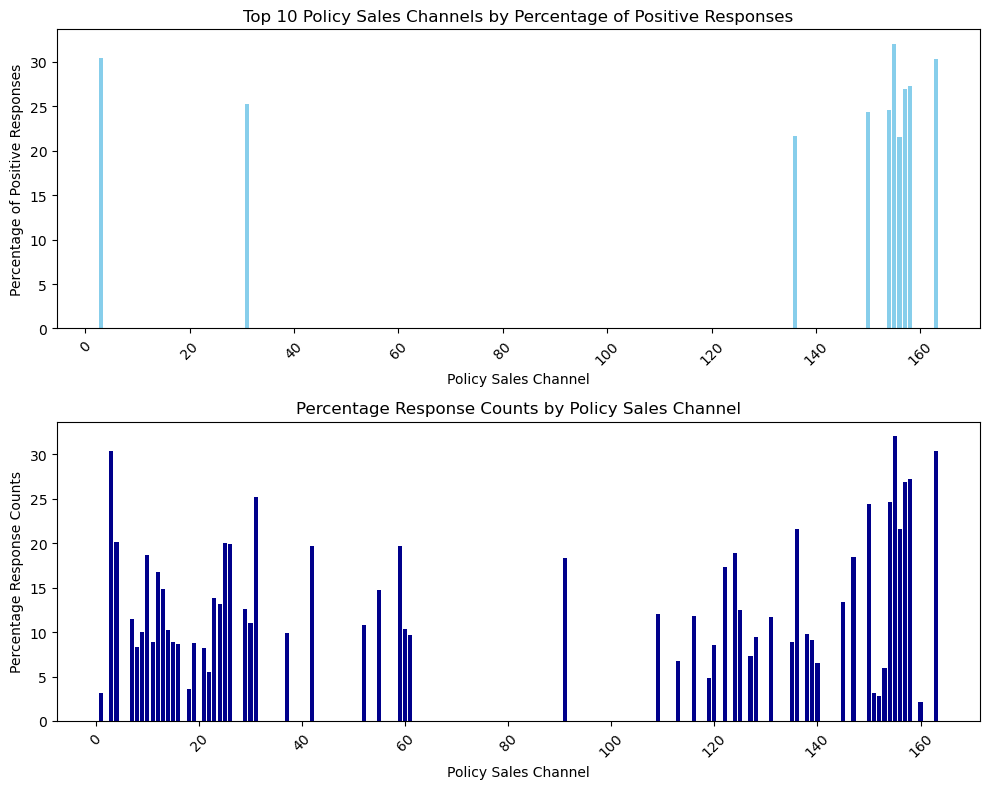

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot top 10 policy sales channels based on percentage of positive responses
axes[0].bar(top_10_policy_channels['Policy_Sales_Channel'], top_10_policy_channels['Percentage'], color='skyblue')
axes[0].set_title('Top 10 Policy Sales Channels by Percentage of Positive Responses')
axes[0].set_xlabel('Policy Sales Channel')
axes[0].set_ylabel('Percentage of Positive Responses')
axes[0].tick_params(axis='x', rotation=45)

# Plot filtered response counts
axes[1].bar(response_counts_filtered['Policy_Sales_Channel'], response_counts_filtered['Percentage'], color='darkblue')
axes[1].set_title('Percentage Response Counts by Policy Sales Channel')
axes[1].set_xlabel('Policy Sales Channel')
axes[1].set_ylabel('Percentage Response Counts')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Distribution Plots

C:\Users\OmShree\AppData\Local\Temp\ipykernel_7412\1722939586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Vintage'])


<Axes: xlabel='Vintage', ylabel='Density'>

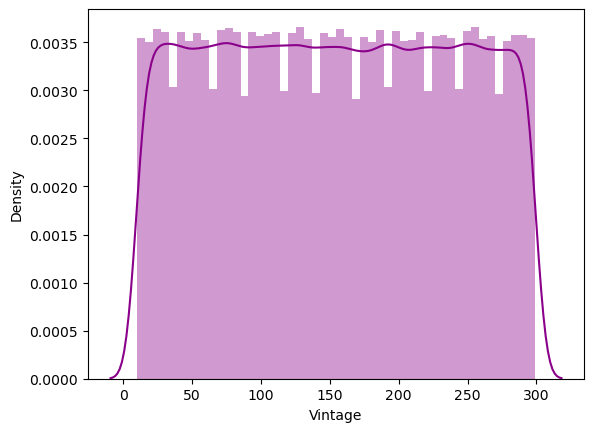

In [53]:
sns.distplot(data['Vintage'])

C:\Users\OmShree\AppData\Local\Temp\ipykernel_7412\843537198.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Policy_Sales_Channel'])


<Axes: xlabel='Policy_Sales_Channel', ylabel='Density'>

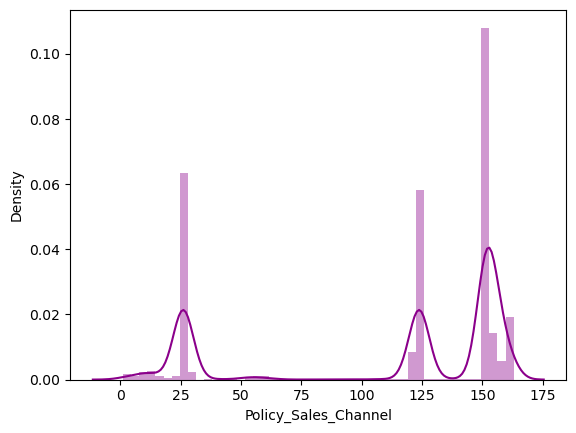

In [54]:
sns.distplot(data['Policy_Sales_Channel'])

C:\Users\OmShree\AppData\Local\Temp\ipykernel_7412\3742837017.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Region_Code'])


<Axes: xlabel='Region_Code', ylabel='Density'>

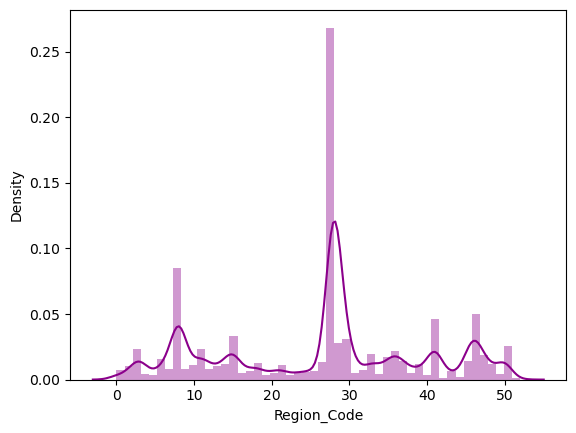

In [55]:
sns.distplot(data['Region_Code'])

C:\Users\OmShree\AppData\Local\Temp\ipykernel_7412\181466487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual_Premium'])


<Axes: xlabel='Annual_Premium', ylabel='Density'>

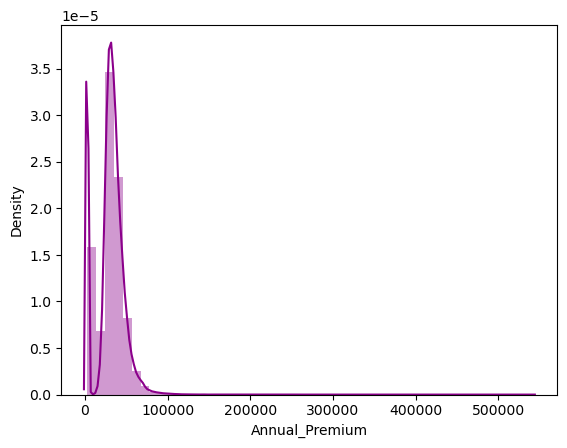

In [56]:
sns.distplot(data['Annual_Premium'])

In [57]:

data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

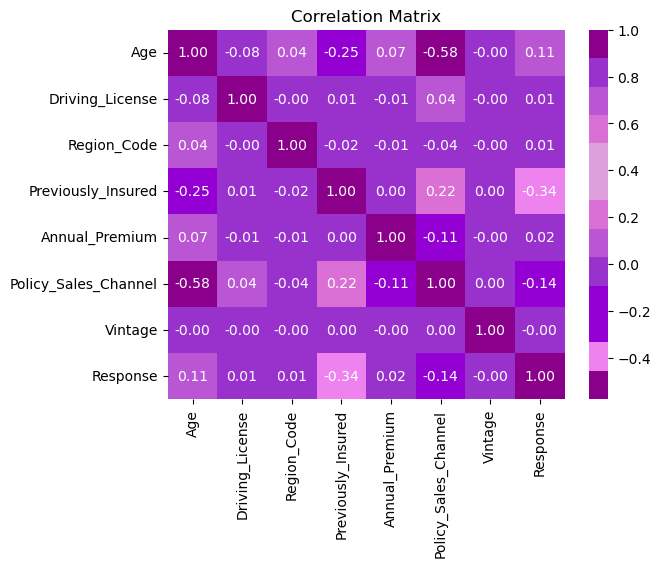

In [58]:
correlation_matrix = data[['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']].corr()
sns.heatmap(correlation_matrix, annot=True,cmap=custom_palette , fmt=".2f")
plt.title('Correlation Matrix')  
plt.show()

Dropping unnecessary columns

In [59]:
data.drop(columns=['Gender','Vintage','id','Driving_License'], inplace=True)
data

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,44.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,1
1,76.0,3.0,0.0,1-2 Year,No,33536.0,26.0,0
2,47.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,1
3,21.0,11.0,1.0,< 1 Year,No,28619.0,152.0,0
4,29.0,41.0,1.0,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...
381104,74.0,26.0,1.0,1-2 Year,No,30170.0,26.0,0
381105,30.0,37.0,1.0,< 1 Year,No,40016.0,152.0,0
381106,21.0,30.0,1.0,< 1 Year,No,35118.0,160.0,0
381107,68.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,0


In [60]:
null_count=data.isnull().sum()
null_count

Age                     2519
Region_Code             3233
Previously_Insured      3208
Vehicle_Age             3458
Vehicle_Damage          3276
Annual_Premium          3166
Policy_Sales_Channel    1955
Response                   0
dtype: int64

In [61]:
response_counts = data.groupby(['Vehicle_Age', 'Vehicle_Damage']).size().reset_index(name='Counts')

# Compute total count by gender
total_count_by_license = data.groupby('Vehicle_Age').size().reset_index(name='Total_Count')

# Merge response_counts with total_count_by_gender
response_counts = response_counts.merge(total_count_by_license, on='Vehicle_Age')

# Calculate the percentage of responses by all responses for each gender
response_counts['Percentage'] = (response_counts['Counts'] / response_counts['Total_Count']) * 100
response_counts

,Vehicle_Age,Vehicle_Damage,Counts,Total_Count,Percentage
0,1-2 Year,No,71401,198448,35.979702
1,1-2 Year,Yes,127019,198448,64.006188
2,< 1 Year,No,115547,163343,70.738875
3,< 1 Year,Yes,47771,163343,29.245820
4,> 2 Years,No,15,15860,0.094578
5,> 2 Years,Yes,15845,15860,99.905422


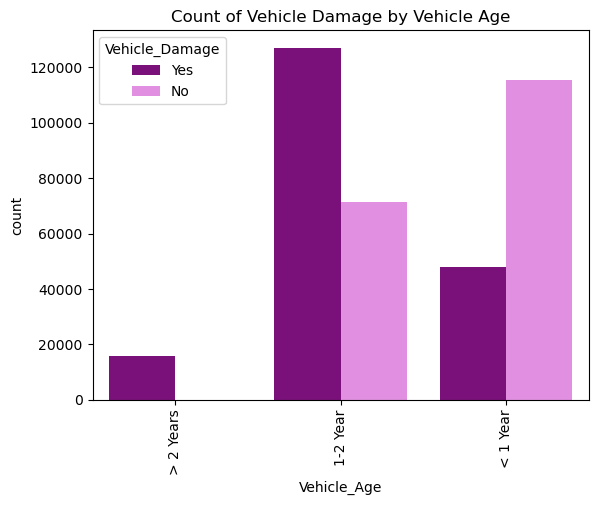

In [62]:
# plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.countplot(data=data,hue='Vehicle_Damage',x='Vehicle_Age')
plt.title('Count of Vehicle Damage by Vehicle Age')
plt.show()

In [63]:
age_mode = data['Age'].mode()[0]  # Calculate mode
data['Age'].fillna(age_mode, inplace=True)  # Fill null values with mode

<Axes: xlabel='Region_Code', ylabel='count'>

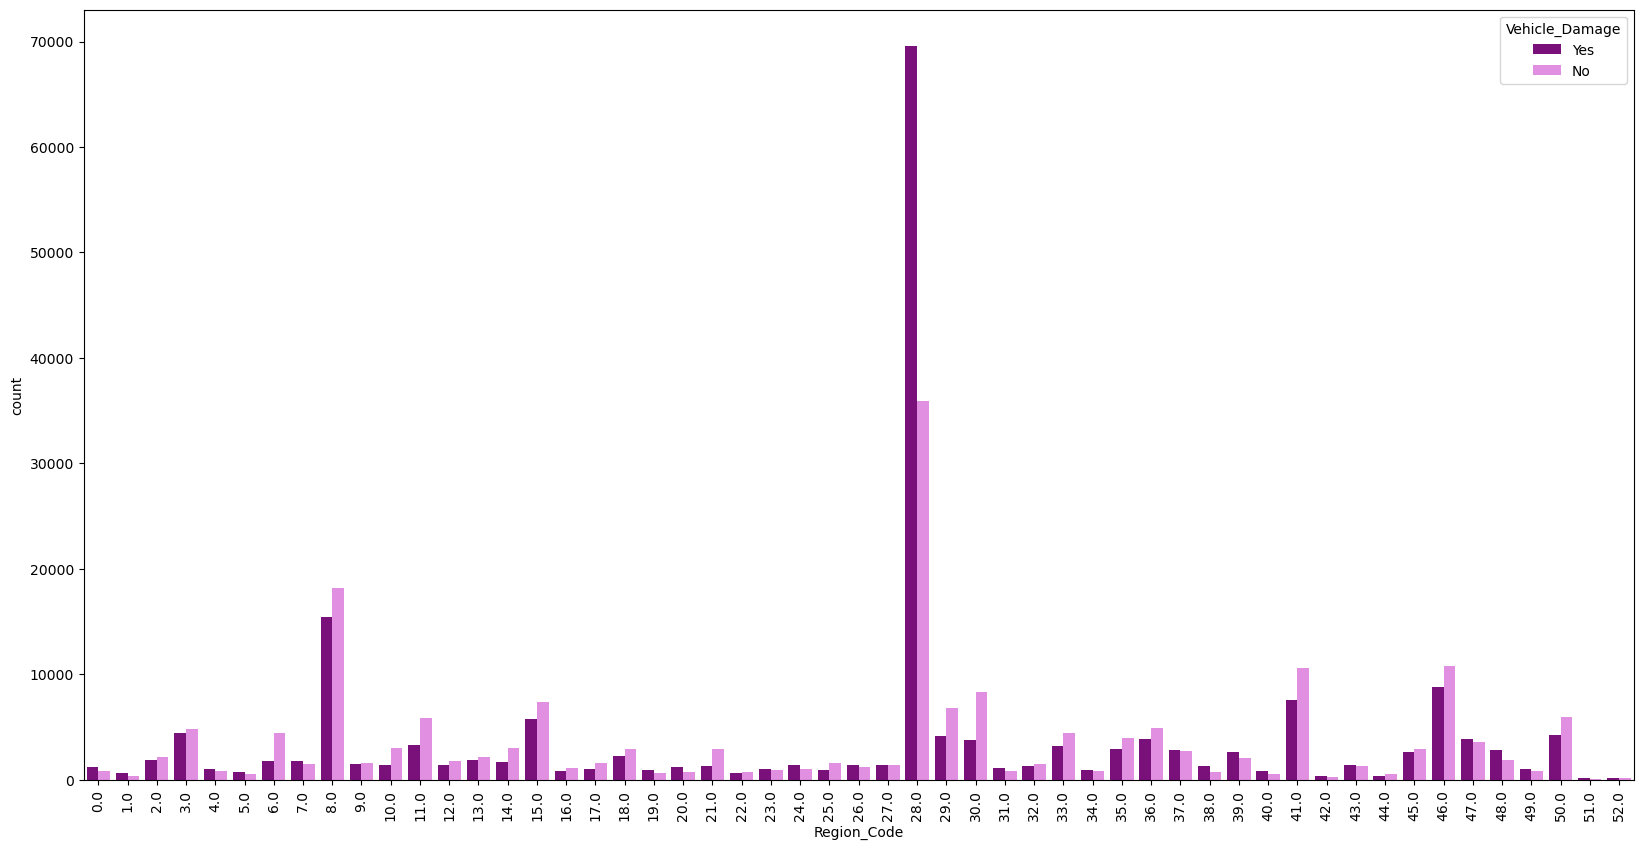

In [64]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(data=data,hue='Vehicle_Damage',x='Region_Code')

<Axes: >

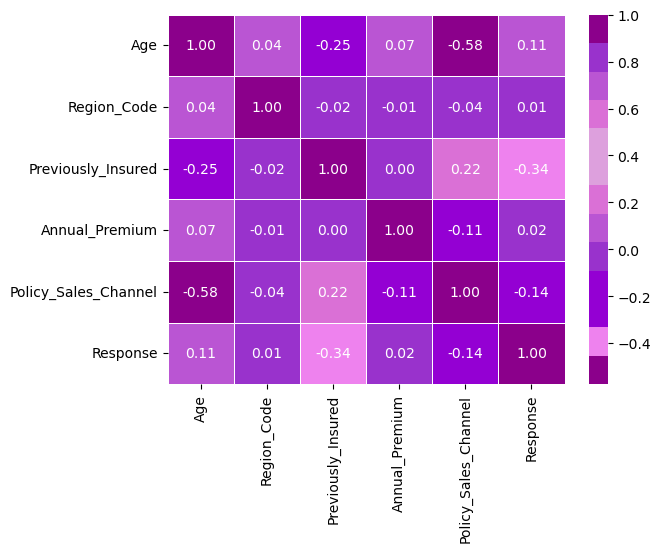

In [65]:
correlation_matrix = data[['Age','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Response']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f", linewidths=0.5)

In [66]:

data

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,44.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,1
1,76.0,3.0,0.0,1-2 Year,No,33536.0,26.0,0
2,47.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,1
3,21.0,11.0,1.0,< 1 Year,No,28619.0,152.0,0
4,29.0,41.0,1.0,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...
381104,74.0,26.0,1.0,1-2 Year,No,30170.0,26.0,0
381105,30.0,37.0,1.0,< 1 Year,No,40016.0,152.0,0
381106,21.0,30.0,1.0,< 1 Year,No,35118.0,160.0,0
381107,68.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,0


<Axes: xlabel='Age', ylabel='count'>

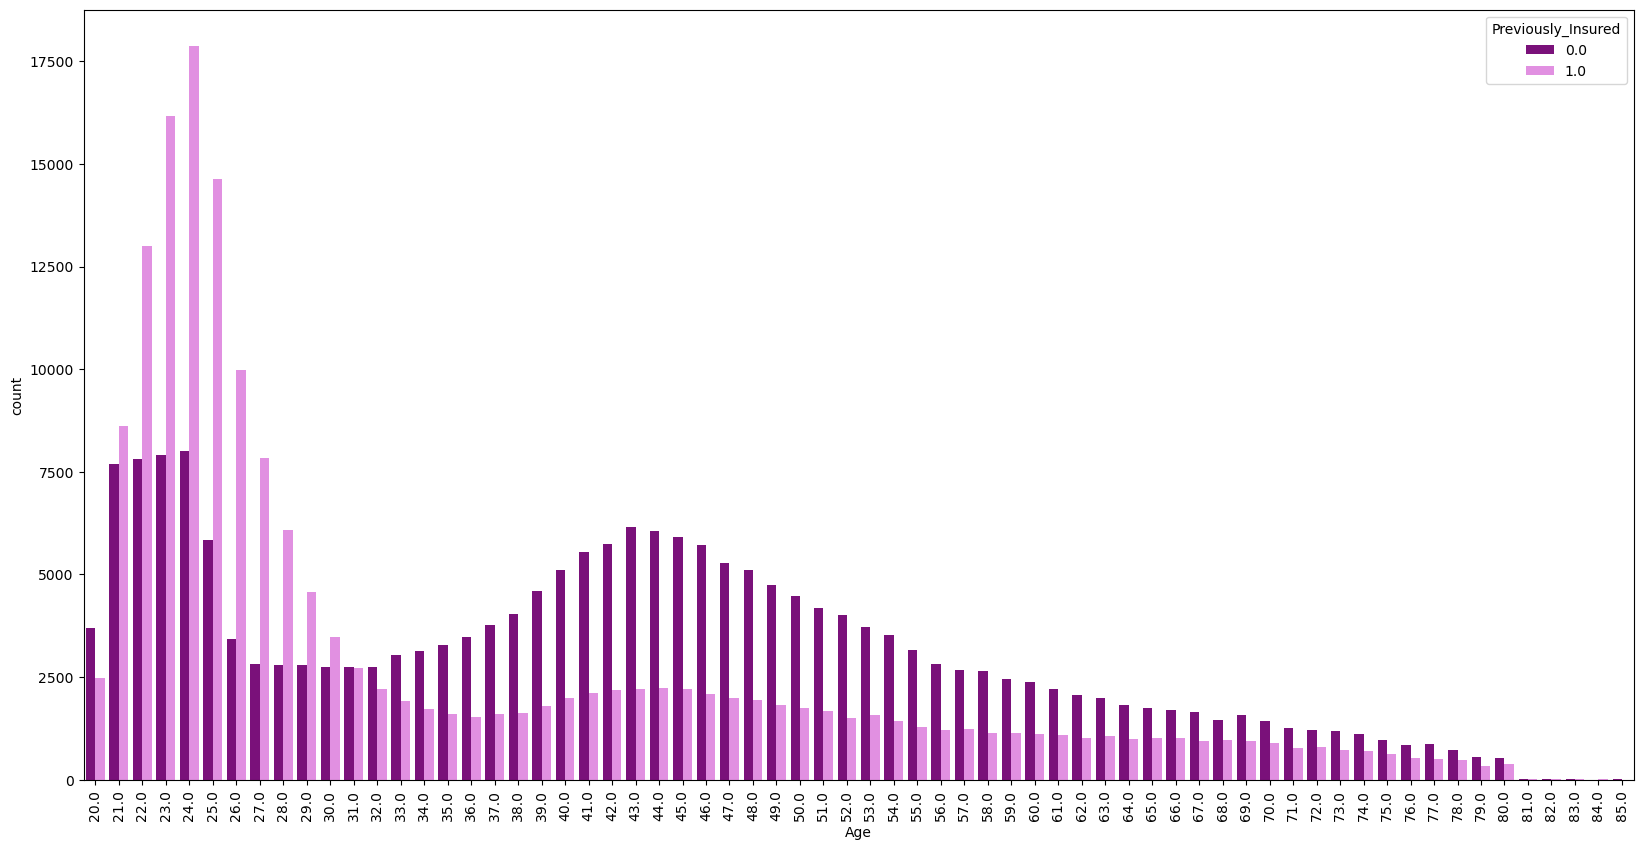

In [67]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(data=data,hue='Previously_Insured',x='Age')

In [68]:
data

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,44.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,1
1,76.0,3.0,0.0,1-2 Year,No,33536.0,26.0,0
2,47.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,1
3,21.0,11.0,1.0,< 1 Year,No,28619.0,152.0,0
4,29.0,41.0,1.0,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...
381104,74.0,26.0,1.0,1-2 Year,No,30170.0,26.0,0
381105,30.0,37.0,1.0,< 1 Year,No,40016.0,152.0,0
381106,21.0,30.0,1.0,< 1 Year,No,35118.0,160.0,0
381107,68.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,0


In [69]:
bins = [20,  30,  40,  50,  60,  100 ]

# Define labels for age groups
labels = ['20-30', '31-40', '41-50', '51-60', '61+']

# Create a new column 'Age_Group' based on age groups
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

data

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Age_Group
0,44.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,1,41-50
1,76.0,3.0,0.0,1-2 Year,No,33536.0,26.0,0,61+
2,47.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,1,41-50
3,21.0,11.0,1.0,< 1 Year,No,28619.0,152.0,0,20-30
4,29.0,41.0,1.0,< 1 Year,No,27496.0,152.0,0,20-30
...,...,...,...,...,...,...,...,...,...
381104,74.0,26.0,1.0,1-2 Year,No,30170.0,26.0,0,61+
381105,30.0,37.0,1.0,< 1 Year,No,40016.0,152.0,0,31-40
381106,21.0,30.0,1.0,< 1 Year,No,35118.0,160.0,0,20-30
381107,68.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,0,61+


<Axes: xlabel='Age_Group', ylabel='count'>

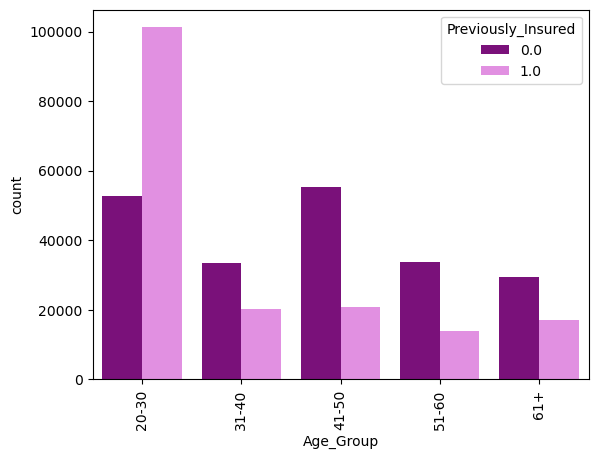

In [70]:
# plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.countplot(data=data,hue='Previously_Insured',x='Age_Group')

<Axes: xlabel='Age_Group', ylabel='count'>

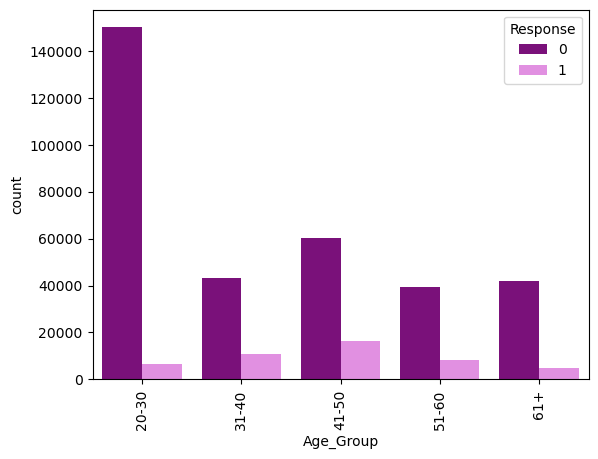

In [71]:
# plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.countplot(data=data,hue='Response',x='Age_Group')

In [72]:
response_counts = data.groupby(['Age_Group', 'Response']).size().reset_index(name='Counts')

# Compute total responses for each category in 'Age_Group'
total_responses = response_counts.groupby('Age_Group')['Counts'].transform('sum')
# total_responses
positive_responses = response_counts[response_counts['Response'] == 1]

# Calculate the percentage of positive responses for each category
positive_responses['Percentage'] = (positive_responses['Counts'] / total_responses) * 100
positive_responses

C:\Users\OmShree\AppData\Local\Temp\ipykernel_7412\1732822251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_responses['Percentage'] = (positive_responses['Counts'] / total_responses) * 100


,Age_Group,Response,Counts,Percentage
1,20-30,1,6644,4.239760
3,31-40,1,10790,20.009272
5,41-50,1,16215,21.240781
7,51-60,1,8430,17.669992
9,61+,1,4631,9.974155


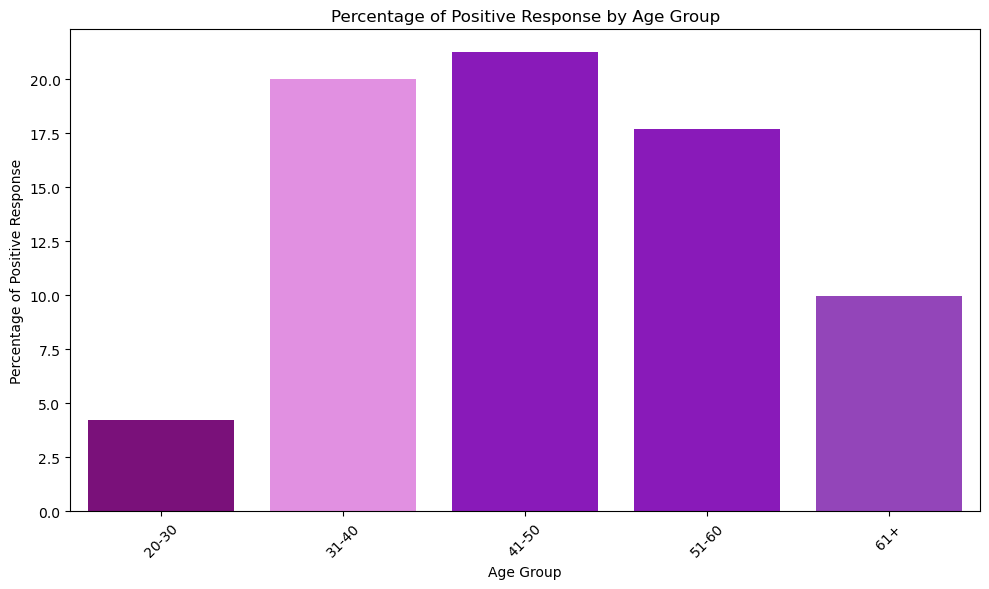

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=positive_responses, x='Age_Group', y='Percentage')
plt.title('Percentage of Positive Response by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Positive Response')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
positive_data=data[(data['Response'] == 1) ]

<Axes: xlabel='Age_Group', ylabel='count'>

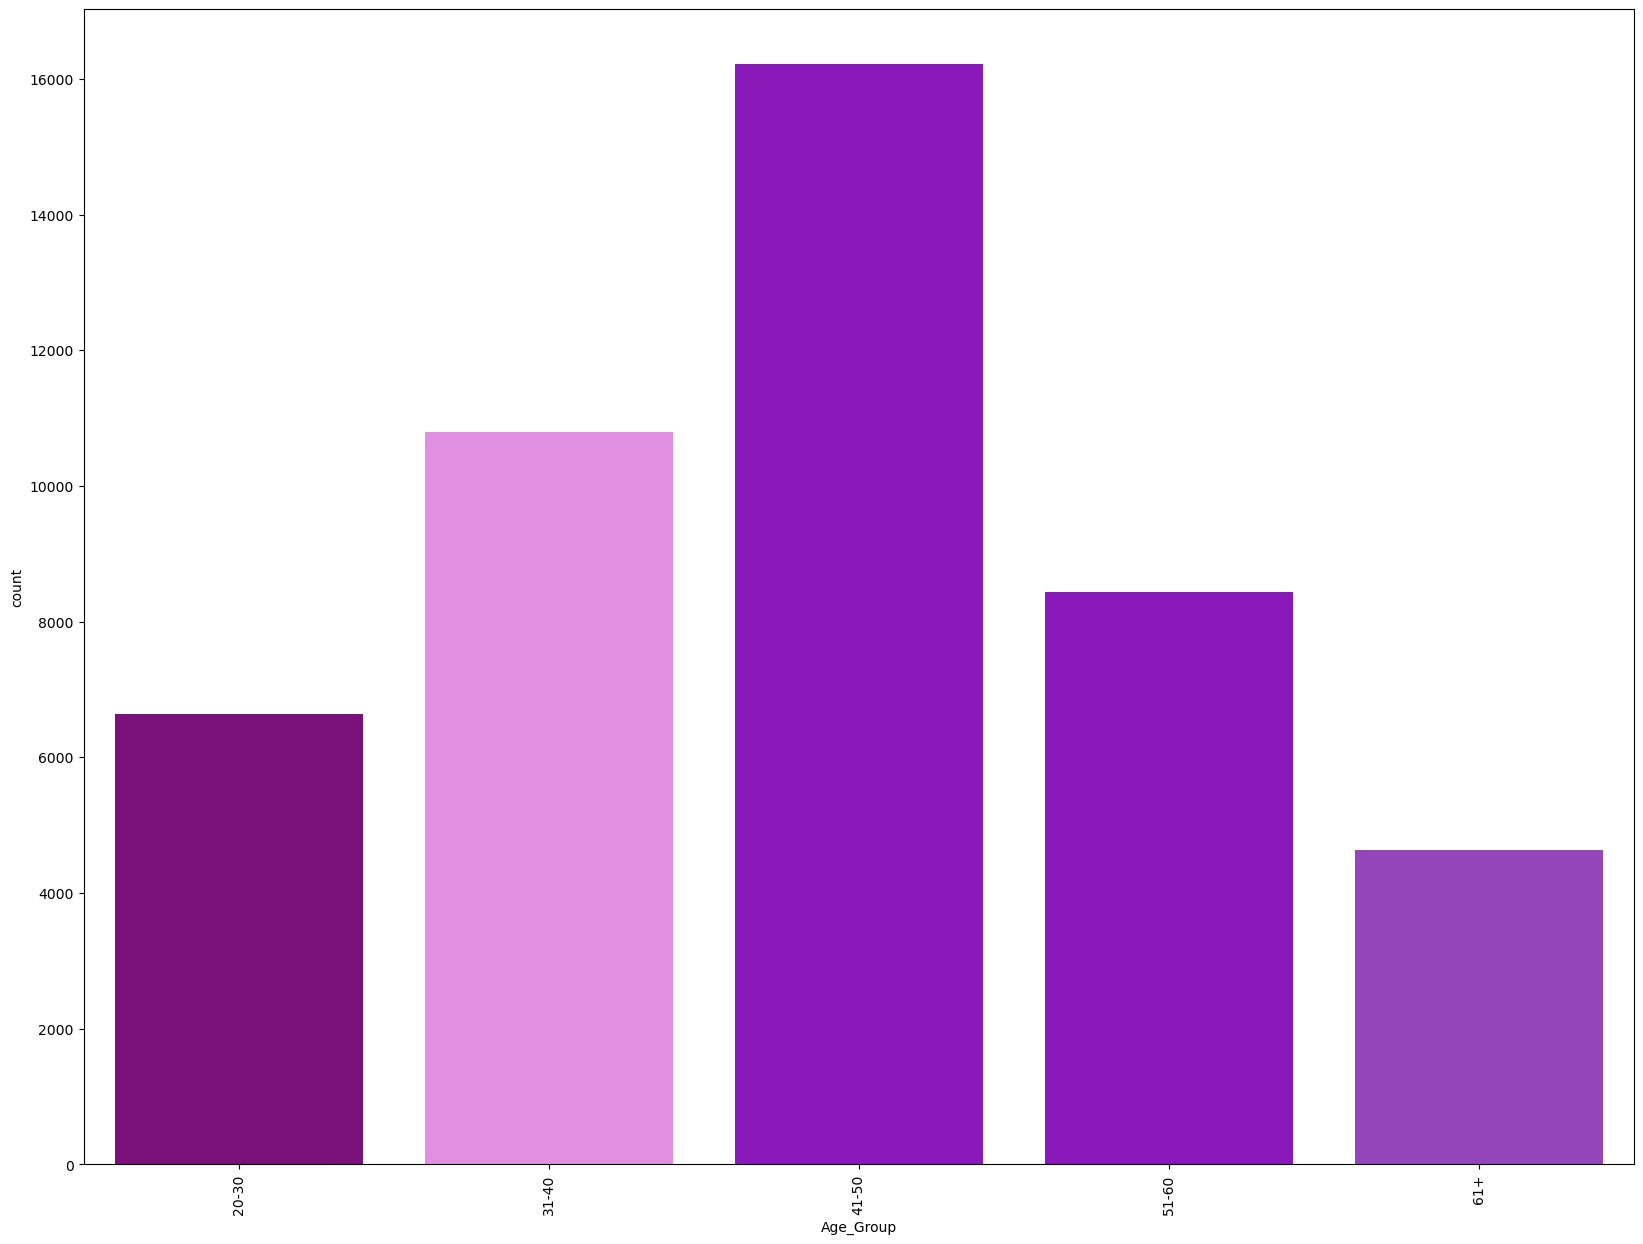

In [75]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.countplot(data=positive_data,x='Age_Group')



In [76]:
data.loc[(data['Vehicle_Age'] == '> 2 Years') & (data['Vehicle_Damage'].isnull()), 'Vehicle_Damage'] = 'Yes'

data

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Age_Group
0,44.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,1,41-50
1,76.0,3.0,0.0,1-2 Year,No,33536.0,26.0,0,61+
2,47.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,1,41-50
3,21.0,11.0,1.0,< 1 Year,No,28619.0,152.0,0,20-30
4,29.0,41.0,1.0,< 1 Year,No,27496.0,152.0,0,20-30
...,...,...,...,...,...,...,...,...,...
381104,74.0,26.0,1.0,1-2 Year,No,30170.0,26.0,0,61+
381105,30.0,37.0,1.0,< 1 Year,No,40016.0,152.0,0,31-40
381106,21.0,30.0,1.0,< 1 Year,No,35118.0,160.0,0,20-30
381107,68.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,0,61+


In [77]:
null_count=data.isnull().sum()
null_count

Age                        0
Region_Code             3233
Previously_Insured      3208
Vehicle_Age             3458
Vehicle_Damage          3276
Annual_Premium          3166
Policy_Sales_Channel    1955
Response                   0
Age_Group                  0
dtype: int64

In [78]:
data = data.dropna(subset=['Region_Code', 'Vehicle_Age'])
data

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Age_Group
0,44.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,1,41-50
1,76.0,3.0,0.0,1-2 Year,No,33536.0,26.0,0,61+
2,47.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,1,41-50
3,21.0,11.0,1.0,< 1 Year,No,28619.0,152.0,0,20-30
4,29.0,41.0,1.0,< 1 Year,No,27496.0,152.0,0,20-30
...,...,...,...,...,...,...,...,...,...
381104,74.0,26.0,1.0,1-2 Year,No,30170.0,26.0,0,61+
381105,30.0,37.0,1.0,< 1 Year,No,40016.0,152.0,0,31-40
381106,21.0,30.0,1.0,< 1 Year,No,35118.0,160.0,0,20-30
381107,68.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,0,61+


In [79]:
null_count=data.isnull().sum()
null_count

Age                       0
Region_Code               0
Previously_Insured       56
Vehicle_Age               0
Vehicle_Damage           53
Annual_Premium          158
Policy_Sales_Channel    119
Response                  0
Age_Group                 0
dtype: int64

<Axes: xlabel='Previously_Insured', ylabel='count'>

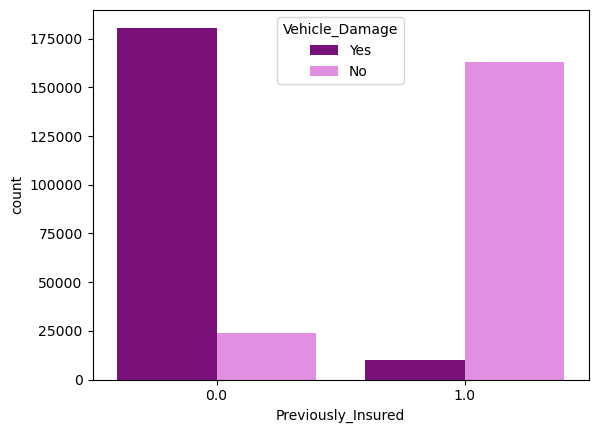

In [80]:
sns.countplot(data=data,hue='Vehicle_Damage',x='Previously_Insured')

In [81]:
data.loc[(data['Vehicle_Damage'] == 'Yes') & (data['Previously_Insured'].isnull()), 'Previously_Insured'] = 0
data.loc[(data['Vehicle_Damage'] == 'No') & (data['Previously_Insured'].isnull()), 'Previously_Insured'] = 1
null_count=data.isnull().sum()
null_count

Age                       0
Region_Code               0
Previously_Insured        5
Vehicle_Age               0
Vehicle_Damage           53
Annual_Premium          158
Policy_Sales_Channel    119
Response                  0
Age_Group                 0
dtype: int64

In [82]:
data.loc[(data['Previously_Insured'] == 1) & (data['Vehicle_Damage'].isnull()), 'Vehicle_Damage'] = 'No'
data.loc[(data['Previously_Insured'] == 0) & (data['Vehicle_Damage'].isnull()), 'Vehicle_Damage'] = 'Yes'
null_count=data.isnull().sum()
null_count

Age                       0
Region_Code               0
Previously_Insured        5
Vehicle_Age               0
Vehicle_Damage            5
Annual_Premium          158
Policy_Sales_Channel    119
Response                  0
Age_Group                 0
dtype: int64

In [83]:
data = data.dropna(subset=['Previously_Insured', 'Vehicle_Damage','Region_Code'])
null_count=data.isnull().sum()
null_count

Age                       0
Region_Code               0
Previously_Insured        0
Vehicle_Age               0
Vehicle_Damage            0
Annual_Premium          158
Policy_Sales_Channel    119
Response                  0
Age_Group                 0
dtype: int64

In [84]:
data.shape

(377463, 9)

In [85]:
data = data.dropna(subset=['Annual_Premium', 'Policy_Sales_Channel','Vehicle_Age'])
null_count=data.isnull().sum()
null_count

Age                     0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Response                0
Age_Group               0
dtype: int64

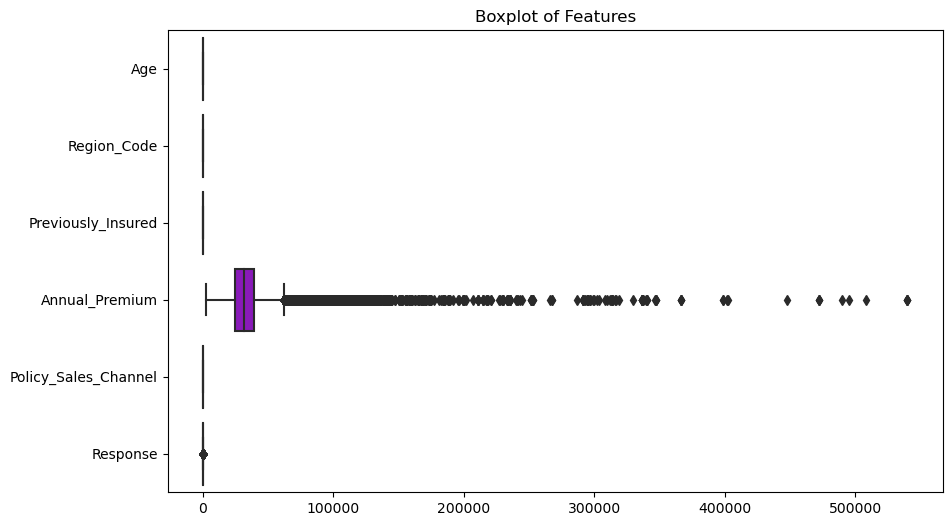

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient="h")
plt.title("Boxplot of Features")
plt.show()

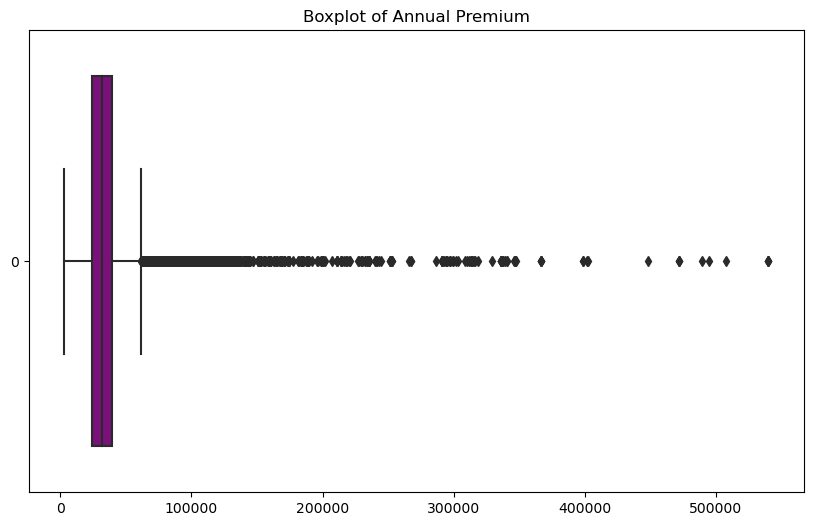

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Annual_Premium'], orient="h")
plt.title("Boxplot of Annual Premium")
plt.show()

In [ ]:
sns.pairplot(data)

In [88]:
data.shape

(377269, 9)

In [89]:
print("Percentage of data removed after EDA :" )
print( ((381109-data.shape[0])/381109)*100)


Percentage of data removed after EDA :
1.0075857563059387


In [90]:
data['Vehicle_Damage'] = data['Vehicle_Damage'].replace({'Yes': 1, 'No': 0})

In [91]:
dataset_refined=data

In [92]:
display(dataset_refined.dtypes)

Age                      float64
Region_Code              float64
Previously_Insured       float64
Vehicle_Age               object
Vehicle_Damage             int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Response                   int64
Age_Group               category
dtype: object

In [93]:
data

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Age_Group
0,44.0,28.0,0.0,> 2 Years,1,40454.0,26.0,1,41-50
1,76.0,3.0,0.0,1-2 Year,0,33536.0,26.0,0,61+
2,47.0,28.0,0.0,> 2 Years,1,38294.0,26.0,1,41-50
3,21.0,11.0,1.0,< 1 Year,0,28619.0,152.0,0,20-30
4,29.0,41.0,1.0,< 1 Year,0,27496.0,152.0,0,20-30
...,...,...,...,...,...,...,...,...,...
381104,74.0,26.0,1.0,1-2 Year,0,30170.0,26.0,0,61+
381105,30.0,37.0,1.0,< 1 Year,0,40016.0,152.0,0,31-40
381106,21.0,30.0,1.0,< 1 Year,0,35118.0,160.0,0,20-30
381107,68.0,14.0,0.0,> 2 Years,1,44617.0,124.0,0,61+


In [94]:
label_encoder = LabelEncoder()
data['Vehicle_Age_Encoded'] = label_encoder.fit_transform(data['Vehicle_Age'])

In [95]:
dataset1=data
dataset1
dataset1=dataset1.drop(columns=['Vehicle_Age'])

In [96]:
dataset1

,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Age_Group,Vehicle_Age_Encoded
0,44.0,28.0,0.0,1,40454.0,26.0,1,41-50,2
1,76.0,3.0,0.0,0,33536.0,26.0,0,61+,0
2,47.0,28.0,0.0,1,38294.0,26.0,1,41-50,2
3,21.0,11.0,1.0,0,28619.0,152.0,0,20-30,1
4,29.0,41.0,1.0,0,27496.0,152.0,0,20-30,1
...,...,...,...,...,...,...,...,...,...
381104,74.0,26.0,1.0,0,30170.0,26.0,0,61+,0
381105,30.0,37.0,1.0,0,40016.0,152.0,0,31-40,1
381106,21.0,30.0,1.0,0,35118.0,160.0,0,20-30,1
381107,68.0,14.0,0.0,1,44617.0,124.0,0,61+,2


In [97]:
dataset1_final = dataset1[dataset1['Annual_Premium'] <= 100000]
dataset1_final['Annual_Premium_Log'] = np.log(dataset1_final['Annual_Premium'])
dataset1_final

C:\Users\OmShree\AppData\Local\Temp\ipykernel_7412\3724737840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1_final['Annual_Premium_Log'] = np.log(dataset1_final['Annual_Premium'])


,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Age_Group,Vehicle_Age_Encoded,Annual_Premium_Log
0,44.0,28.0,0.0,1,40454.0,26.0,1,41-50,2,10.607921
1,76.0,3.0,0.0,0,33536.0,26.0,0,61+,0,10.420375
2,47.0,28.0,0.0,1,38294.0,26.0,1,41-50,2,10.553049
3,21.0,11.0,1.0,0,28619.0,152.0,0,20-30,1,10.261826
4,29.0,41.0,1.0,0,27496.0,152.0,0,20-30,1,10.221796
...,...,...,...,...,...,...,...,...,...,...
381104,74.0,26.0,1.0,0,30170.0,26.0,0,61+,0,10.314603
381105,30.0,37.0,1.0,0,40016.0,152.0,0,31-40,1,10.597035
381106,21.0,30.0,1.0,0,35118.0,160.0,0,20-30,1,10.466469
381107,68.0,14.0,0.0,1,44617.0,124.0,0,61+,2,10.705870


In [98]:
dataset1_final=dataset1_final.drop(columns=[ 'Age'])
dataset1_final

,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Age_Group,Vehicle_Age_Encoded,Annual_Premium_Log
0,28.0,0.0,1,40454.0,26.0,1,41-50,2,10.607921
1,3.0,0.0,0,33536.0,26.0,0,61+,0,10.420375
2,28.0,0.0,1,38294.0,26.0,1,41-50,2,10.553049
3,11.0,1.0,0,28619.0,152.0,0,20-30,1,10.261826
4,41.0,1.0,0,27496.0,152.0,0,20-30,1,10.221796
...,...,...,...,...,...,...,...,...,...
381104,26.0,1.0,0,30170.0,26.0,0,61+,0,10.314603
381105,37.0,1.0,0,40016.0,152.0,0,31-40,1,10.597035
381106,30.0,1.0,0,35118.0,160.0,0,20-30,1,10.466469
381107,14.0,0.0,1,44617.0,124.0,0,61+,2,10.705870


In [99]:


dataset1_final_encoded = pd.get_dummies(dataset1_final, columns=['Age_Group'])
dataset1_final_encoded

,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Vehicle_Age_Encoded,Annual_Premium_Log,Age_Group_20-30,Age_Group_31-40,Age_Group_41-50,Age_Group_51-60,Age_Group_61+
0,28.0,0.0,1,40454.0,26.0,1,2,10.607921,False,False,True,False,False
1,3.0,0.0,0,33536.0,26.0,0,0,10.420375,False,False,False,False,True
2,28.0,0.0,1,38294.0,26.0,1,2,10.553049,False,False,True,False,False
3,11.0,1.0,0,28619.0,152.0,0,1,10.261826,True,False,False,False,False
4,41.0,1.0,0,27496.0,152.0,0,1,10.221796,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,26.0,1.0,0,30170.0,26.0,0,0,10.314603,False,False,False,False,True
381105,37.0,1.0,0,40016.0,152.0,0,1,10.597035,False,True,False,False,False
381106,30.0,1.0,0,35118.0,160.0,0,1,10.466469,True,False,False,False,False
381107,14.0,0.0,1,44617.0,124.0,0,2,10.705870,False,False,False,False,True


In [100]:
dataset1_final_encoded=dataset1_final_encoded.drop(columns='Annual_Premium')
dataset1_final_encoded

,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Response,Vehicle_Age_Encoded,Annual_Premium_Log,Age_Group_20-30,Age_Group_31-40,Age_Group_41-50,Age_Group_51-60,Age_Group_61+
0,28.0,0.0,1,26.0,1,2,10.607921,False,False,True,False,False
1,3.0,0.0,0,26.0,0,0,10.420375,False,False,False,False,True
2,28.0,0.0,1,26.0,1,2,10.553049,False,False,True,False,False
3,11.0,1.0,0,152.0,0,1,10.261826,True,False,False,False,False
4,41.0,1.0,0,152.0,0,1,10.221796,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,26.0,1.0,0,26.0,0,0,10.314603,False,False,False,False,True
381105,37.0,1.0,0,152.0,0,1,10.597035,False,True,False,False,False
381106,30.0,1.0,0,160.0,0,1,10.466469,True,False,False,False,False
381107,14.0,0.0,1,124.0,0,2,10.705870,False,False,False,False,True


In [105]:
display(dataset1_final_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 376497 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Region_Code           376497 non-null  float64
 1   Previously_Insured    376497 non-null  float64
 2   Vehicle_Damage        376497 non-null  int64  
 3   Policy_Sales_Channel  376497 non-null  float64
 4   Response              376497 non-null  int64  
 5   Vehicle_Age_Encoded   376497 non-null  int32  
 6   Annual_Premium_Log    376497 non-null  float64
 7   Age_Group_20-30       376497 non-null  bool   
 8   Age_Group_31-40       376497 non-null  bool   
 9   Age_Group_41-50       376497 non-null  bool   
 10  Age_Group_51-60       376497 non-null  bool   
 11  Age_Group_61+         376497 non-null  bool   
dtypes: bool(5), float64(4), int32(1), int64(2)
memory usage: 23.3 MB


None

{'id': 381108.9999999999, 'Gender': 1048.185847194809, 'Age': 21090.641797441505, 'Driving_License': 37.90590899290648, 'Region_Code': 7179.505365934883, 'Previously_Insured': 43958.16156138119, 'Vehicle_Age': 18614.662562347752, 'Vehicle_Damage': 47460.18262034989, 'Annual_Premium': 52187.14970917017, 'Policy_Sales_Channel': 26313.107728448893, 'Vintage': 260.1999561252899}


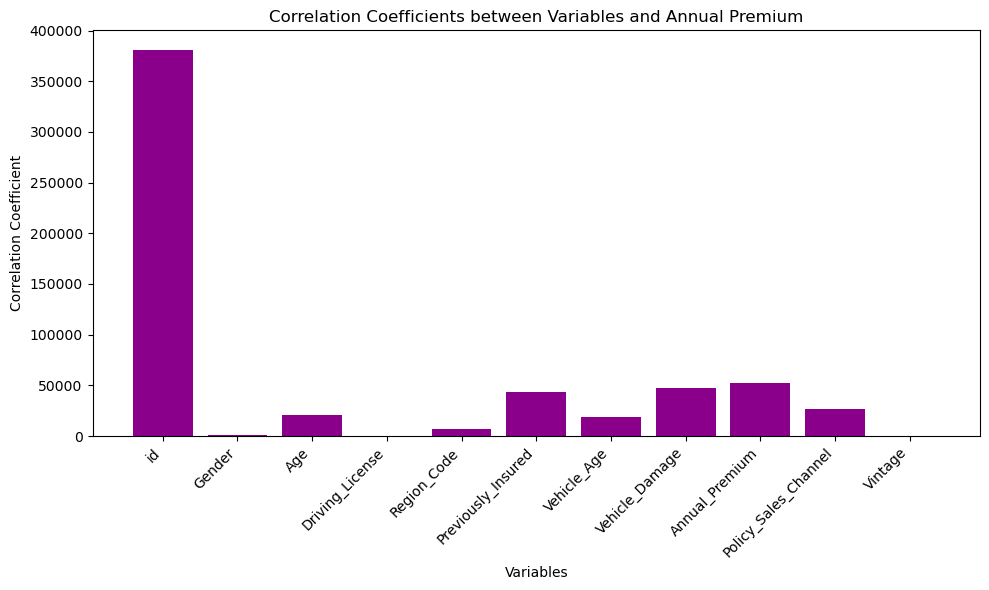

In [106]:
df= pd.read_csv('Dataset.csv')
columns = df.columns.tolist()
# columns.remove('id')
columns.remove('Response')
 
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Vintage'], df['Response']).to_numpy()
 
contingency_table
 
chi2_statistic, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)
 
final_chi_corr = {}
 
for feature in columns:
    original_data_cleaned = df.dropna(subset=[feature])
    contingency_table = pd.crosstab(original_data_cleaned[feature], original_data_cleaned['Response']).to_numpy()
    chi2_statistic, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)
    final_chi_corr[feature] = chi2_statistic
 
print(final_chi_corr)
 
variables = list(final_chi_corr.keys())
correlation_values = list(final_chi_corr.values())
 
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(variables, correlation_values)
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Variables and Annual Premium')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
 
# Display the bar chart
plt.show()

In [107]:
dataset1_final_encoded.columns

Index(['Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Response', 'Vehicle_Age_Encoded',
       'Annual_Premium_Log', 'Age_Group_20-30', 'Age_Group_31-40',
       'Age_Group_41-50', 'Age_Group_51-60', 'Age_Group_61+'],
      dtype='object')

In [108]:
print(dataset1_final_encoded.dtypes)

Region_Code             float64
Previously_Insured      float64
Vehicle_Damage            int64
Policy_Sales_Channel    float64
Response                  int64
Vehicle_Age_Encoded       int32
Annual_Premium_Log      float64
Age_Group_20-30            bool
Age_Group_31-40            bool
Age_Group_41-50            bool
Age_Group_51-60            bool
Age_Group_61+              bool
dtype: object


In [109]:
df=dataset1_final_encoded
X = df.drop(columns=['Response'])
y = df['Response']


In [119]:
df.to_csv('final_values.csv', index=False)

In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [112]:
# Define hyperparameter grids for each model
param_grid_lr = {'C': [ 0.1, 1, 10]}
param_grid_dt = {'max_depth': [3, 5, 7, 9]}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7 ]}
param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2]}
param_grid_xgb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2]}


In [113]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

In [200]:

# Define hyperparameter grids for each model
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10]}
param_grid_dt = {'max_depth': [3, 5, 7, 9, 11]}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7 ]}
param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2,0.5]}
param_grid_xgb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2, 0.5]}

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

# Define hyperparameter grids for each model
param_grids = {
    "Logistic Regression": param_grid_lr,
    "Decision Tree": param_grid_dt,
    "Random Forest": param_grid_rf,
    "Gradient Boosting": param_grid_gb,
    "XGBoost": param_grid_xgb
}

# Perform hyperparameter tuning for each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best score for {name}: {best_score}")

    # Evaluate the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------")


Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Best parameters for Logistic Regression: {'C': 0.001}
Best score for Logistic Regression: 0.8772708104412967
Accuracy for Logistic Regression: 0.8785496081816975
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66146
           1       0.00      0.00      0.00      9144

    accuracy                           0.88     75290
   macro avg       0.44      0.50      0.47     75290
weighted avg       0.77      0.88      0.82     75290

--------------------------------------------
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Decision Tree: {'max_depth': 3}
Best score for Decision Tree: 0.8772708104412967
Accuracy for Decision Tree: 0.8785496081816975
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66146
           1       0.00      0.00      0.00      9144

    accuracy                           0.88     75290
   macro avg       0.44      0.50      0

c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyboardInterrupt: 

# Reading the data

In [114]:
df=dataset1_final_encoded
x_train = df.drop(columns=['Response'])
y_train = df['Response']

OverSampling to reduce the biasness of the response

In [115]:

oversampler = SMOTE()
X_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)
df_train_oversample = pd.concat([X_train_resampled, y_train_resampled], axis=1)
df_train_oversample


NameError: name 'SMOTE' is not defined

In [207]:
undersampler = NearMiss() 
X_train_resampled, y_train_resampled = undersampler.fit_resample(x_train, y_train) 
df_train_undersample = pd.concat([X_train_resampled, y_train_resampled], axis=1)
df_train_undersample

,Age,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vehicle_Age_Encoded,Annual_Premium_Log,Age_Group_20-30,Age_Group_31-40,Age_Group_41-50,Age_Group_51-60,Age_Group_61+,Response
0,45.0,35.0,0.0,1,124.0,0,7.874739,False,False,True,False,False,0
1,57.0,28.0,0.0,1,26.0,2,7.874739,False,False,False,True,False,0
2,52.0,31.0,0.0,1,26.0,0,7.874739,False,False,False,True,False,0
3,38.0,48.0,0.0,1,124.0,0,7.874739,False,True,False,False,False,0
4,30.0,28.0,0.0,1,157.0,0,7.874739,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92205,40.0,46.0,0.0,1,26.0,0,10.222232,False,False,True,False,False,1
92206,41.0,28.0,0.0,1,124.0,0,10.528811,False,False,True,False,False,1
92207,46.0,28.0,0.0,1,124.0,0,10.455676,False,False,True,False,False,1
92208,61.0,28.0,0.0,1,26.0,0,10.689100,False,False,False,False,True,1


In [104]:
df_train_oversample.to_csv('df_train_oversample.csv', index=False)
df_train_undersample.to_csv('df_train_undersample.csv', index=False)

NameError: name 'df_train_oversample' is not defined

In [ ]:
df_undersample = pd.read_csv('df_train_undersample.csv')
df_undersample

In [ ]:
df_oversample = pd.read_csv('df_train_oversample.csv')
df_oversample

In [ ]:
def logisticRegression(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(max_iter=100000, random_state=2) 
    lr.fit(X_train, y_train) 

    predictions = lr.predict(X_test) 

    print(classification_report(y_test, predictions))

In [ ]:
def decisionTreeClassifier(X_train, X_test, y_train, y_test):
    dtc = DecisionTreeClassifier(random_state=2)
    dtc.fit(X_train, y_train)

    y_pred = dtc.predict(X_test)

    print(classification_report(y_test, y_pred))

In [ ]:
def randomForestClassifier(X_train, X_test, y_train, y_test):
    rfc = RandomForestClassifier(random_state=2)
    rfc.fit(X_train, y_train)

    y_pred = rfc.predict(X_test)

    print(classification_report(y_test, y_pred))

In [ ]:
def gradientBoostingClassifier(X_train, X_test, y_train, y_test):
    clf = GradientBoostingClassifier(random_state=2)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print(classification_report(y_test, y_pred))

In [ ]:
def xgBoost(X_train, X_test, y_train, y_test):
    xgbo = xgb.XGBClassifier(random_state=42)
    xgbo.fit(X_train, y_train)

    y_pred = xgbo.predict(X_test)

    print(classification_report(y_test, y_pred))

In [ ]:
def findPrecisions(X_train, X_test, y_train, y_test):
    print('\n')
    print("Logistic Regression")
    logisticRegression(X_train, X_test, y_train, y_test)
    print('\n')
    print("Decision Tree Classifier")
    decisionTreeClassifier(X_train, X_test, y_train, y_test)
    print('\n')
    print("Random Forest Classifier")
    randomForestClassifier(X_train, X_test, y_train, y_test)
    print('\n')
    print("Gradient Boosting Classifier")
    gradientBoostingClassifier(X_train, X_test, y_train, y_test)
    print('\n')
    print("XG Boost Classifier")
    xgBoost(X_train, X_test, y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_undersample.drop(columns=['Response']), df_undersample['Response'], test_size = 0.20, random_state = 2) 

print("UNDERSAMPLE DATASET:")

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

findPrecisions(X_train, X_test, y_train, y_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
param_grid_dt = {'max_depth': [3, 5, 7, 9, 11]}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}
param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [ 0.1, 0.2, 0.5]}
param_grid_xgb = {'n_estimators': [50, 100, 150], 'learning_rate': [ 0.1, 0.2, 0.5]}

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=100000, random_state=2),
    "Decision Tree": DecisionTreeClassifier(random_state=2),
    "Random Forest": RandomForestClassifier(random_state=2),
    "Gradient Boosting": GradientBoostingClassifier(random_state=2),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": param_grid_lr,
    "Decision Tree": param_grid_dt,
    "Random Forest": param_grid_rf,
    "Gradient Boosting": param_grid_gb,
    "XGBoost": param_grid_xgb
}


# Perform hyperparameter tuning for each model
for name, model in models.items():
    print(f"Tuning hyperparameters for {name} with UNDERSAMPLE DATASET: ")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best score for {name}: {best_score}")

    # Evaluate the best model on the test data
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_oversample.drop(columns=['Response']), df_oversample['Response'], test_size = 0.20, random_state = 2) 

print("OVERSAMPLE DATASET:")

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

findPrecisions(X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10]}
param_grid_dt = {'max_depth': [3, 5, 7, 9, 11]}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}
param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2, 0.5]}
param_grid_xgb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2, 0.5]}

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=100000, random_state=2),
    "Decision Tree": DecisionTreeClassifier(random_state=2),
    "Random Forest": RandomForestClassifier(random_state=2),
    "Gradient Boosting": GradientBoostingClassifier(random_state=2),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": param_grid_lr,
    "Decision Tree": param_grid_dt,
    "Random Forest": param_grid_rf,
    "Gradient Boosting": param_grid_gb,
    "XGBoost": param_grid_xgb
}

# Perform hyperparameter tuning for each model
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best score for {name}: {best_score}")

    # Evaluate the best model on the test data
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------")


In [103]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/39/6c/4ab39615fc3ffe40faaa62fc2feb43868b8ce946c671e84bf476c1e06116/shap-0.45.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
    --------------------------------------- 10.2/453.1 kB ? eta -:--:--
    --------------------------------------- 10.2/453.1 kB ? eta -:--:--
    --------------------------------------- 10.2/453.1 kB ? eta -:--:--
   -- ------------------------------------ 30.7/453.1 kB 163.8 kB/s eta 0:00:03
   ----- --------------------------------- 61.4/453.1 kB 297.7 kB/s eta 0:00:02
   ------ -------------------------------- 71.7/453.1 kB 280.5 kB/s eta 0:00:02
   ------- ------------------------------- 92.2/453.1 kB 327.7 kB/

In [117]:
import shap
import xgboost as xgb
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Load dataset (example using Boston housing dataset)
# X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(df_undersample.drop(columns=['Response']), df_undersample['Response'], test_size = 0.20, random_state = 2) 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set parameters
params = {'learning_rate': 0.5, 'n_estimators': 150}

# Train XGBoost model with specified parameters
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Visualize SHAP values (e.g., summary plot)
shap.summary_plot(shap_values, X_test, plot_type="bar")


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\OmShree\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)